Análisis de datos 
Laboratorio Avanzado II 
Estudiante: Esteban Vinicio Soto Monge


Fecha 20230619

In [10]:
#dependencies
#!pip install pandas
#!pip install numpy
#!pip install matplotlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

#Main path location (The folder in which all measurements are saved)
main_path = r"C:\Users\esteb\electrochromicfilms\Edgar"


#working at
working_at = "cicima_laptop"

if working_at == "CICIMA":
    base_folder = r"C:\Users\EstebanSoto\electrochromicfilms"
elif working_at == "home":
    base_folder = r"C:\Users\esteb\electrochromicfilms"
elif working_at == "colaboratory":
    base_folder = r""
elif working_at == "cicima_laptop":
    base_folder = r"/home/vinicio/electrochromicfilms"
    
WIDTH = 15
HEIGHT = 6
img_counter = 0

In [24]:
class PotentiostatFile:
        def __init__(self, file_path, type_of_file, date, film_area, min_transmittance = None, max_transmittance = None):
            self.file_path = file_path
            self.basename = os.path.basename(file_path)
            self.type_of_file = type_of_file
            self.film_area = film_area
            self.column_labels = self._get_column_labels(type_of_file)
            self.column_names = self._get_column_names(type_of_file)
            self.dataframe = self._read_file(file_path, self.column_names)
            self.min_transmittance = min_transmittance
            self.max_transmittance = max_transmittance
            self.data_processing()
            self.date = date

        def _get_column_labels(self, type_of_file):
            if type_of_file == "CV":
                return {"time": "Time (s)", "current": "Current (mA/$cm^2$)", "voltage": "Potential vs Ag/AgCl 3M ref (V)"}
            elif type_of_file == "CA":
                return {"time": "Time (s)", "current": "Current (mA/$cm^2$)", "voltage": "Potential vs Ag/AgCl 3M ref (V)"}
            elif type_of_file == "CA+":
                return {"time": "Time (s)", "voltage": "Potential vs Ag/AgCl 3M ref (V)", "current": "Current (mA/$cm^2$)", "transmittance":"Transmittance [%]"}
            elif type_of_file == "OCP":
                return {"time": "Time (s)", "voltage": "Potential vs Ag/AgCl 3M ref (V)"}
            elif type_of_file == "OCP+":
                return {"time": "Time (s)", "voltage": "Potential vs Ag/AgCl 3M ref (V)","transmittance":"Transmittance [V$_{external}$]"}
            elif type_of_file == "CV+":
                return {"time": "Time (s)", "scan": "Scan", "voltage": "Potential vs Ag/AgCl 3M ref (V)", "current":"Current (mA/$cm^2$)", "transmittance":"Transmittance [%]", "Q+":"Q+", "Q-":"Q-"}
            else:
                raise ValueError("Unsupported file type.")
                
        def _get_column_names(self, type_of_file):
            column_names_CV =  ["time", "voltage", "current"] 
            column_names_CA = ["time", "voltage", "current"] 
            column_names_CA_plus = ["time", "voltage", "current", "transmittance"] 
            column_names_OCP = ["time", "voltage"] 
            column_names_OCP_plus = ["time", "voltage", "transmittance"] 
            column_names_CV_plus = ["time", "scan", "voltage", "current", "transmittance", "Q+", "Q-"] 
            
            if type_of_file == "CV":
                return column_names_CV
            elif type_of_file == "CA":
                return column_names_CA
            elif type_of_file == "CA+":
                return column_names_CA_plus
            elif type_of_file == "OCP":
                return column_names_OCP
            elif type_of_file == "OCP+":
                return column_names_OCP_plus
            elif type_of_file == "CV+":
                return column_names_CV_plus
            else:
                raise ValueError("Unsupported file type.")
        
        def _read_file(self, file_path, column_labels):
            print(self.column_names)
            return pd.read_csv(file_path, sep="\t", names=self.column_names, header=0)
            
        def get_filename(self):
            return self.file_path.split('/')[-1]
        
        def get_max_transmittance(self):
            return self.dataframe["transmittance"].max()
        def get_min_transmittance(self):
            return self.dataframe["transmittance"].min()
        
        def set_max_transmittance(self, max_transmittance):
            self.max_transmittance = max_transmittance
        def set_min_transmittance(self, min_transmittance):
            self.min_transmittance = min_transmittance
        
        def saveimage(self, analysis_name):
            dirname = os.path.join(os.path.dirname(self.file_path), "images")
            try:
                os.makedirs(dirname)
            except Exception as e:
                print(e)
            img_counter = 0
            
            filename = os.path.join(dirname, f"{analysis_name} analysis for {self.basename} on {self.date} ({img_counter}).png")
            while os.path.exists(filename):
                img_counter = img_counter + 1
                filename = os.path.join(dirname, f"{analysis_name} for {self.basename} on {self.date} ({img_counter}).png")
            
            plt.savefig(filename)
            
        def time_vs_current_analysis(self, start = None, end = None, type = None, xlim = None, ylim = None):
            basename = os.path.basename(self.file_path)
            x = "time"
            y = "current"
            analysis_name = "current vs time analysis"
            df = self.dataframe
            df2 = df.copy(deep=True)
            #filter by time
            if start:
                df2 = df2.loc[df[x]>start,]
            if end:
                df2 = df2.loc[df[x]<end,]
            #markersizes
            n = len(df[x].values)  # specify the size of the list
            sizes = [1] * n
            
            #plot
            plt.figure(figsize=(WIDTH,HEIGHT))
            if type == "scatter":
                df2.plot.scatter(x, y, grid=True, sizes= sizes)
            else:
                df2.plot(x, y)
                plt.grid()
            #plt.title(f"File {basename}. Date: {self.date}")
            if xlim: 
                plt.xlim(*xlim)  # Set x-axis limits
            if ylim: 
                plt.ylim(*ylim)  # Set y-axis limits
            plt.xlabel(self.column_labels[x])
            plt.ylabel(self.column_labels[y])
            self.saveimage(analysis_name)
            plt.show()
            
        def time_vs_voltage_analysis(self, start = None, end = None, type = None, xlim = None, ylim = None):
            basename = os.path.basename(self.file_path)
            x = "time"
            y = "voltage"
            analysis_name = "potential vs time analysis"
            df = self.dataframe
            df2 = df.copy(deep=True)
            #filter by time
            if start:
                df2 = df2.loc[df[x]>start,]
            if end:
                df2 = df2.loc[df[x]<end,]
            #markersizes
            n = len(df[x].values)  # specify the size of the list
            sizes = [1] * n
            
            #plot
            plt.figure(figsize=(WIDTH,HEIGHT))
            if type == "scatter":
                df2.plot.scatter(x, y, grid=True, sizes= sizes)
            else:
                df2.plot(x, y)
                plt.grid()
            #plt.title(f"File {basename}. Date: {self.date}")
            if xlim: 
                plt.xlim(*xlim)  # Set x-axis limits
            if ylim: 
                plt.ylim(*ylim)  # Set y-axis limits
            plt.xlabel(self.column_labels[x])
            plt.ylabel(self.column_labels[y])
            self.saveimage(analysis_name)
            plt.show()
    
        def voltage_vs_current_analysis(self, start = None, end = None, type = None, xlim = None, ylim = None):
            basename = os.path.basename(self.file_path)
            x = "voltage"
            y = "current"
            analysis_name = "potential vs current analysis"
            df = self.dataframe
            df2 = df.copy(deep=True)
            #filter by time
            if start:
                df2 = df2.loc[df["time"]>start,]
            if end:
                df2 = df2.loc[df["time"]<end,]

            #markersizes
            n = len(df[x].values)  # specify the size of the list
            sizes = [1] * n
            
            #plot
            plt.figure(figsize=(WIDTH,HEIGHT))
            if type == "scatter":
                df2.plot.scatter(x, y, grid=True, sizes= sizes)
            else:
                df2.plot(x, y)
                plt.grid()
            #plt.title(f"File {basename}. Date: {self.date}")
            if xlim: 
                plt.xlim(*xlim)  # Set x-axis limits
            if ylim: 
                plt.ylim(*ylim)  # Set y-axis limits
            plt.xlabel(self.column_labels[x])
            plt.ylabel(self.column_labels[y])
            self.saveimage(analysis_name)
            plt.show()

        def transmittance_vs_time_analysis(self, start = None, end = None, type = None, xlim = None, ylim = None):
            basename = os.path.basename(self.file_path)
            x = "time"
            y = "transmittance"
            analysis_name = "transmittance vs time analysis"
            df = self.dataframe
            df2 = df.copy(deep=True)
            
            #filter by time
            if start:
                df2 = df2.loc[df[x]>start,]
            if end:
                df2 = df2.loc[df[x]<end,]
            #markersizes
            n = len(df[x].values)  # specify the size of the list
            sizes = [1] * n
            
            #plot
            plt.figure(figsize=(WIDTH,HEIGHT))
            if type == "scatter":
                df2.plot.scatter(x, y, grid=True, sizes= sizes)
            else:
                df2.plot(x, y)
                plt.grid()
            #plt.title(f"File {basename}. Date: {self.date}")
            if xlim: 
                plt.xlim(*xlim)  # Set x-axis limits
            if ylim: 
                plt.ylim(*ylim)  # Set y-axis limits
            plt.xlabel(self.column_labels[x])
            plt.ylabel(self.column_labels[y])
            self.saveimage(analysis_name)
            plt.show()
            
        def current_and_transmittance_vs_time_analysis(self, start = None, end = None, type = None, xlim1 = None, ylim1 = None,xlim2 = None, ylim2 = None ):
            basename = os.path.basename(self.file_path)
            x = "time"
            y = "transmittance"
            y2 = "current"
            analysis_name = "transmittance and current vs time analysis"
            df = self.dataframe
            df2 = df.copy(deep=True)
            
            #filter by time
            if start:
                df2 = df2.loc[df[x]>start,]
            if end:
                df2 = df2.loc[df[x]<end,]
            #markersizes
            n = len(df[x].values)  # specify the size of the list
            sizes = [1] * n
            
            #plot
            plt.figure(figsize=(WIDTH,HEIGHT))
            if type == "scatter":
                df2.plot.scatter(x, y, grid=True, sizes= sizes)
                df2.plot.scatter(x, y2, grid=True, sizes= sizes)
            else:
                x_val = df2[x].values
                y_val = df2[y].values
                y2_val = df2[y2].values
                # Create figure and primary axis
                fig, ax1 = plt.subplots()
                
                # Plot data on primary axis
                ax1.plot(x_val, y_val, 'g-')
                ax1.set_xlabel(self.column_labels[x])
                ax1.set_ylabel(self.column_labels[y], color='g')
                
                # Create secondary axis
                ax2 = ax1.twinx()
                
                # Plot data on secondary axis
                ax2.plot(x_val, y2_val, 'b-')
                ax2.set_ylabel(self.column_labels[y2], color='b')
                
                #set limits
                if xlim1: 
                    ax1.set_xlim(*xlim1)  # Set x-axis limits
                if ylim1: 
                    ax1.set_ylim(*ylim1)  # Set y-axis limits
                    
                #set limits
                if xlim2: 
                    ax2.set_xlim(*xlim2)  # Set x-axis limits
                if ylim2: 
                    ax2.set_ylim(*ylim2)  # Set y-axis limits
                    
                plt.grid()
            #plt.title(f"File {basename}. Date: {self.date}")
            
            self.saveimage(analysis_name)
            plt.show()
        
        def voltage_and_current_vs_time_analysis(self, start = None, end = None, type = None, xlim1 = None, ylim1 = None,xlim2 = None, ylim2 = None ):
            basename = os.path.basename(self.file_path)
            x = "time"
            y = "voltage"
            y2 = "current"
            analysis_name = "voltage and current vs time analysis"
            df = self.dataframe
            df2 = df.copy(deep=True)
            
            #filter by time
            if start:
                df2 = df2.loc[df[x]>start,]
            if end:
                df2 = df2.loc[df[x]<end,]
            #markersizes
            n = len(df[x].values)  # specify the size of the list
            sizes = [1] * n
            
            #plot
            plt.figure(figsize=(WIDTH,HEIGHT))
            if type == "scatter":
                df2.plot.scatter(x, y, grid=True, sizes= sizes)
                df2.plot.scatter(x, y2, grid=True, sizes= sizes)
            else:
                x_val = df2[x].values
                y_val = df2[y].values
                y2_val = df2[y2].values
                # Create figure and primary axis
                fig, ax1 = plt.subplots()
                
                # Plot data on primary axis
                ax1.plot(x_val, y_val, 'g-')
                ax1.set_xlabel(self.column_labels[x])
                ax1.set_ylabel(self.column_labels[y], color='g')
                
                # Create secondary axis
                ax2 = ax1.twinx()
                
                # Plot data on secondary axis
                ax2.plot(x_val, y2_val, 'b-')
                ax2.set_ylabel(self.column_labels[y2], color='b')
                
                #set limits
                if xlim1: 
                    ax1.set_xlim(*xlim1)  # Set x-axis limits
                if ylim1: 
                    ax1.set_ylim(*ylim1)  # Set y-axis limits
                    
                #set limits
                if xlim2: 
                    ax2.set_xlim(*xlim2)  # Set x-axis limits
                if ylim2: 
                    ax2.set_ylim(*ylim2)  # Set y-axis limits
                    
                plt.grid()
            #plt.title(f"File {basename}. Date: {self.date}")
            
            self.saveimage(analysis_name)
            plt.show()
        
        def voltage_and_transmittance_vs_time_analysis(self, start = None, end = None, type = None, xlim1 = None, ylim1 = None,xlim2 = None, ylim2 = None ):
            basename = os.path.basename(self.file_path)
            x = "time"
            y = "transmittance"
            y2 = "voltage"
            analysis_name = "potential and transmittance vs time analysis"
            df = self.dataframe
            df2 = df.copy(deep=True)
            
            #filter by time
            
            if start:
                df2 = df2.loc[df[x]>start,]
            if end:
                df2 = df2.loc[df[x]<end,]
            #markersizes
            n = len(df[x].values)  # specify the size of the list
            sizes = [1] * n
            
            #plot
            plt.figure(figsize=(WIDTH,HEIGHT))
            if type == "scatter":
                df2.plot.scatter(x, y, grid=True, sizes= sizes)
                df2.plot.scatter(x, y2, grid=True, sizes= sizes)
            else:
                x_val = df2[x].values
                y_val = df2[y].values
                y2_val = df2[y2].values
                # Create figure and primary axis
                fig, ax1 = plt.subplots()
                
                # Plot data on primary axis
                ax1.plot(x_val, y_val, 'g-')
                ax1.set_xlabel(self.column_labels[x])
                ax1.set_ylabel(self.column_labels[y], color='g')
                
                
                
                # Create secondary axis
                ax2 = ax1.twinx()
                
                # Plot data on secondary axis
                ax2.plot(x_val, y2_val, 'b-')
                ax2.set_ylabel(self.column_labels[y2], color='b')
                
                #set limits
                if xlim1: 
                    ax1.set_xlim(*xlim1)  # Set x-axis limits
                if ylim1: 
                    ax1.set_ylim(*ylim1)  # Set y-axis limits
                    
                #set limits
                if xlim2: 
                    ax2.set_xlim(*xlim2)  # Set x-axis limits
                if ylim2: 
                    ax2.set_ylim(*ylim2)  # Set y-axis limits
                    
                plt.grid()
            #plt.title(f"File {basename}. Date: {self.date}")
            
            self.saveimage(analysis_name)
            plt.show()
            
        def custom_analysis(self, x, y, start = None, end = None, type = None, xlim = None, ylim = None):
            basename = os.path.basename(self.file_path)
            df = self.dataframe
            df2 = df.copy(deep=True)
            analysis_name = f"{y} vs {x} analysis"
            #filter by time
            if start:
                df2 = df2.loc[df[x]>start,]
            if end:
                df2 = df2.loc[df[x]<end,]
            #markersizes
            n = len(df[x].values)  # specify the size of the list
            sizes = [1] * n
            
            #plot
            plt.figure(figsize=(WIDTH,HEIGHT))
            if type == "scatter":
                df2.plot.scatter(x, y, grid=True, sizes= sizes)
            else:
                df2.plot(x, y)
                plt.grid()
            #plt.title(f"File {basename}. Date: {self.date}")
            if xlim: 
                plt.xlim(*xlim)  # Set x-axis limits
            if ylim: 
                plt.ylim(*ylim)  # Set y-axis limits
            plt.xlabel(self.column_labels[x])
            plt.ylabel(self.column_labels[y])
            self.saveimage(analysis_name)
            plt.show()
    
        def get_dataframe(self):
            return self.dataframe
            
        def data_processing(self):
            if self.type_of_file != "OCP" and self.type_of_file != "OCP+"  :
                self.calculate_current_density()
            if self.type_of_file == "CA+" or self.type_of_file == "CV+":
                self.calculate_transmittance()
                ...
                
                
        def calculate_transmittance(self):
            if self.max_transmittance and self.min_transmittance:
                df = self.dataframe
                transmittance_range = self.max_transmittance -self.min_transmittance
                df["transmittance"] = (df["transmittance"]-self.min_transmittance) / transmittance_range * 100.0#to change it to mA/cm**2
                print(f"{self.max_transmittance=}{self.min_transmittance=}{transmittance_range=}")
            else:
                print("No max and min transmittance info provided")
                
                df = self.dataframe
                self.max_transmittance = df["transmittance"].max()
                self.min_transmittance = df["transmittance"].min()
                
                transmittance_range = self.max_transmittance -self.min_transmittance
                df["transmittance"] = (df["transmittance"]-self.min_transmittance) / transmittance_range * 100.0#to change it to mA/cm**2
                print(f"{self.max_transmittance=}{self.min_transmittance=}{transmittance_range=}")
        def calculate_current_density(self):
            #calculate current density
            ito_area = self.film_area #cm**2
            df = self.dataframe
            df["current"] = df["current"] / ito_area * 1000 #to change it to mA/cm**2
            

## 20230619

###  wo3_film_continuous_electrodeposition_A

In [194]:
current_folder = os.path.join(base_folder, r"Edgar","20230619","20230619","electrodeposition_WO3_thin_films_onto_ITO_A","wo3_film_continuous_electrodeposition_A")
OCP_1_filename = os.path.join(current_folder,  r"OCP_1")
CA_2_filename =  os.path.join(current_folder, r"CA_2")
OCP_3_filename = os.path.join(current_folder,  r"OCP_3")

##### OCP 1

In [196]:
ocp_1_df = pd.read_csv(OCP_1_filename, sep = "\t")
ocp_1_df.head()

,Time (s),OCP value (V)
0,10.935907,0.395294
1,11.935907,NaN
2,12.935907,NaN
3,13.935907,NaN
4,14.935907,NaN


In [197]:
#defines aliases for the column names
short_columns = ["time", "potential"]
aliases_columns_tuple = zip(short_columns, ocp_1_df.columns)
aliases_columns = dict(aliases_columns_tuple)
aliases_columns

axis_labels = ["Time (s)", "Potential (V)"]
aliases_axis = dict(zip(short_columns, axis_labels))
aliases_axis

{'time': 'Time (s)', 'potential': 'Potential (V)'}

In [198]:
#print OCP_1
def makeplot(x, y, aliases_columns, aliases_axis, df): 
    #plots the x and y aliases with their respective labels
    df.plot(aliases_columns[x], aliases_columns[y], grid = "True")
    plt.xlabel(aliases_axis[x])
    plt.ylabel(aliases_axis[y])
    plt.show()


##### Chronoamperometry

In [199]:
ca_2_df = pd.read_csv(CA_2_filename, sep = "\t")
current_df = ca_2_df
current_df

,Time (s),WE(1).Current (A),WE(1).Potential (V)
0,72.061754,-0.001703,-0.699646
1,72.161754,-0.001653,-0.698975
2,72.261754,-0.001664,-0.699219
3,72.361754,-0.001692,-0.699036
4,72.461754,-0.001723,-0.698914
...,...,...,...
3495,421.561753,-0.004766,-0.699402
3496,421.661753,-0.004766,-0.699188
3497,421.761753,-0.004766,-0.699493
3498,421.861753,-0.004766,-0.699310


In [200]:
#defines aliases for the column names
short_columns = ["time", "current", "potential"]
aliases_columns = dict(zip(short_columns, current_df.columns))
aliases_columns

axis_labels = ["Time (s)", "Current (A)", "Potential (V)"]
aliases_axis = dict(zip(short_columns, axis_labels))
print(f"{aliases_axis=}\n{aliases_columns =}")

aliases_axis={'time': 'Time (s)', 'current': 'Current (A)', 'potential': 'Potential (V)'}
aliases_columns ={'time': 'Time (s)', 'current': 'WE(1).Current (A)', 'potential': 'WE(1).Potential (V)'}


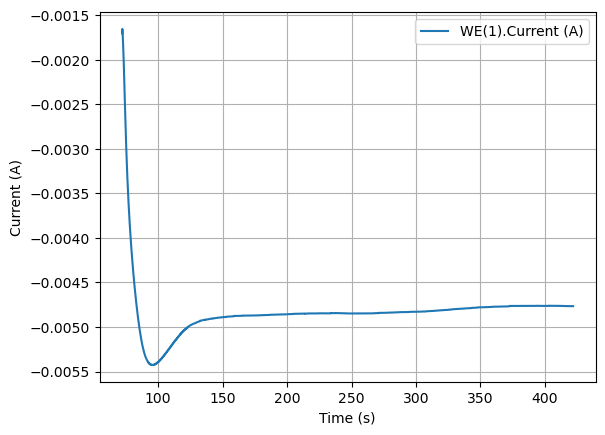

In [201]:
#CA_2 plot
x = "time"
y = "current"
makeplot(x, y,aliases_columns, aliases_axis, current_df)

#potential vs current


In [ ]:
#CA_2 plot
y = "potential"
x = "current"
makeplot(x, y,aliases_columns, aliases_axis, ca_2_df)

In [ ]:
#CA_2 plot
x = "time"
y = "potential"
makeplot(x, y,aliases_columns, aliases_axis, ca_2_df)

In [ ]:
##### OCP 3 
ocp_1_df = pd.read_csv(OCP_1_filename, sep = "\t")
ocp_1_df


In [ ]:
#### wo3_film_continuous_electrodeposition_B
def wo3_film_continuous_electrodeposition_B_0230619():

    #area cm**2
    ito_area = 2.5*2.5 #cm**2
        
    
    current_folder = os.path.join(base_folder, r"Edgar\20230619\20230619\electrodeposition_WO3_thin_films_onto_ITO_A\wo3_film_continuous_electrodeposition_B" )
    
    CA_2_file = os.path.join(current_folder, "CA_2")
    OCP_1_file =  os.path.join(current_folder, "OCP_1")
    OCP_3_file =  os.path.join(current_folder, "OCP_3")
    
    #column names lists
    column_names_CA = ["time", "current", "voltage"] 
    column_names_OCP = ["time", "voltage"] 

    #column labels
    column_labels_CA = {"time":"Time (s)", "current":"Current (mA/$cm^2$)", "voltage":"Voltage (V)"}
    column_labels_OCP = {"time":"Time (s)", "voltage":"Voltage (V)"}
    
    #read files
    CA_2_df = pd.read_csv(CA_2_file, sep = "\t", names = column_names_CA, header = 0)
    OCP_1_df = pd.read_csv(OCP_1_file, sep = "\t", names = column_names_OCP, header = 0)
    OCP_3_df = pd.read_csv(OCP_3_file, sep = "\t", names = column_names_OCP, header = 0)

    #print dataframes
    print(OCP_1_df)
    print(OCP_3_df)
    
    #calculate current density
    
    CA_2_df["current"] = CA_2_df["current"] / ito_area * 1000 #to change it to mA/cm**2


    #CA_2 plot time vs current
    x = "time"
    y = "current"
    CA_2_df.plot(x, y, grid =True)
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()
    
    #CA_2 plot current vs voltage
    x = "current"
    y = "voltage"
    CA_2_df.plot(x, y, grid =True)
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()


In [ ]:
wo3_film_continuous_electrodeposition_B_0230619()

## 20230626

### electrodeposition_prussian_blue

#### electrodeposition_sample_B

In [ ]:
def electrodeposition_prussian_blue_electrodeposition_sample_B_20230626():

    #area cm**2
    ito_area = 2.5*2.5 #cm**2
     
    current_folder = os.path.join(base_folder, r"Edgar\20230626\20230626\electrodeposition_prussian_blue\electrodeposition_sample_B")
    
    #CA_2_file = os.path.join(current_folder, "CA_2")
    CP_data_2_file = os.path.join(current_folder, "CP_data_2")
    OCP_1_file =  os.path.join(current_folder, "OCP_1")
    OCP_3_file =  os.path.join(current_folder, "OCP_3")
    
    #column names lists
    column_names_CA = ["time", "voltage", "current"] 
    column_names_OCP = ["time", "voltage"] 

    #column labels
    column_labels_CA = {"time":"Time (s)", "current":"Current (mA/cm^2)", "voltage":"Voltage (V)"}
    column_labels_OCP = {"time":"Time (s)", "voltage":"Voltage (V)"}
    
    #read files
    CP_data_2_df = pd.read_csv(CP_data_2_file, sep = "\t", names = column_names_CA, header = 0)
    OCP_1_df = pd.read_csv(OCP_1_file, sep = "\t", names = column_names_OCP, header = 0)
    OCP_3_df = pd.read_csv(OCP_3_file, sep = "\t", names = column_names_OCP, header = 0)

    #print dataframes
    print(OCP_1_df)
    print(OCP_3_df)
    
    #calculate current density
    
    CP_data_2_df["current"] = CP_data_2_df["current"] / ito_area * 1000 #to change it to mA/cm**2
    #CP_data_2_df["current"] = np.round(CP_data_2_df["current"], 4)

    #CA_2 plot time vs current
    x = "time"
    y = "current"
    CP_data_2_df.plot(x, y, grid =True)
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()
    
    #CA_2 plot current vs voltage
    x = "current"
    y = "voltage"
    CP_data_2_df.plot(x, y, grid =True)
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()


In [ ]:
electrodeposition_prussian_blue_electrodeposition_sample_B_20230626()

#### electrodeposition_sample_D

In [ ]:
def electrodeposition_prussian_blue_electrodeposition_sample_D_20230626():

    #area cm**2
    ito_area = 2.5*2.5 #cm**2
        
    
    current_folder = os.path.join(base_folder, r"Edgar\20230626\20230626\electrodeposition_prussian_blue\electrodeposition_sample_D")
    #CA_2_file = os.path.join(current_folder, "CA_2")
    CP_data_2_file = os.path.join(current_folder, "CP_data_2")
    OCP_1_file =  os.path.join(current_folder, "OCP_1")
    OCP_3_file =  os.path.join(current_folder, "OCP_3")
    
    #column names lists
    
    column_names_CA = ["time", "voltage", "current"] 
    column_names_OCP = ["time", "voltage"] 

    #column labels
    column_labels_CA = {"time":"Time (s)", "current":"Current (mA/cm^2)", "voltage":"Voltage (V)"}
    column_labels_OCP = {"time":"Time (s)", "voltage":"Voltage (V)"}
    
    #read files
    CP_data_2_df = pd.read_csv(CP_data_2_file, sep = "\t", names = column_names_CA, header = 0)
    OCP_1_df = pd.read_csv(OCP_1_file, sep = "\t", names = column_names_OCP, header = 0)
    OCP_3_df = pd.read_csv(OCP_3_file, sep = "\t", names = column_names_OCP, header = 0)

    #print dataframes
    print(OCP_1_df)
    print(OCP_3_df)
    
    #calculate current density
    
    CP_data_2_df["current"] = CP_data_2_df["current"] / ito_area * 1000 #to change it to mA/cm**2
    #CP_data_2_df["current"] = np.round(CP_data_2_df["current"], 4)

    #CA_2 plot time vs current
    x = "time"
    y = "current"
    CP_data_2_df.plot.scatter(x, y, grid =True)
    plt.title("File CP_data_2")
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()
    
    #CA_2 plot current vs voltage
    x = "current"
    y = "voltage"
    CP_data_2_df.plot.scatter(x, y, grid =True)
    plt.title("File CP_data_2")
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()


In [ ]:
electrodeposition_prussian_blue_electrodeposition_sample_D_20230626()

## 20230810

### WO3_ITO_20230717_G

In [ ]:
def WO3_ITO_20230717_G_analysis():

    date = "20230810"
    #area cm**2
    ito_area = 2.5*2.5 #cm**2
        
    
    current_folder = os.path.join(base_folder, r"Edgar\20230810 (1)\WO3_ITO_20230717_G")
    #CA_2_file = os.path.join(current_folder, "CA_2")
    CA_2_file = os.path.join(current_folder, "CA_2")
    OCP_1_file =  os.path.join(current_folder, "OCP_1")
    OCP_3_file =  os.path.join(current_folder, "OCP_3")
    
    #column names lists
    
    column_names_CA = ["time", "voltage", "current"] 
    column_names_OCP = ["time", "voltage"] 

    #column labels
    column_labels_CA = {"time":"Time (s)", "current":"Current (mA/cm^2)", "voltage":"Voltage (V)"}
    column_labels_OCP = {"time":"Time (s)", "voltage":"Voltage (V)"}
    
    #read files
    CA_2_df = pd.read_csv(CA_2_file, sep = "\t", names = column_names_CA, header = 0)
    OCP_1_df = pd.read_csv(OCP_1_file, sep = "\t", names = column_names_OCP, header = 0)
    OCP_3_df = pd.read_csv(OCP_3_file, sep = "\t", names = column_names_OCP, header = 0)

    #print dataframes
    print(OCP_1_df)
    print(OCP_3_df)
    
    #calculate current density
    
    CA_2_df["current"] = CA_2_df["current"] / ito_area * 1000 #to change it to mA/cm**2
    #CP_data_2_df["current"] = np.round(CP_data_2_df["current"], 4)

    #CA_2 plot time vs current
    x = "time"
    y = "current"
    CA_2_df.plot.scatter(x, y, grid =True)
    plt.title(f"File CP_data_2 Date: {date}")
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()
    
    #CA_2 plot current vs voltage
    x = "current"
    y = "voltage"
    CA_2_df.plot.scatter(x, y, grid =True)
    plt.title(f"File CP_data_2. Date: {date}")
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()


In [ ]:
WO3_ITO_20230717_G_analysis()

In [ ]:
def WO3_ITO_20230717_H_analysis():
    date = "20230810"
    #area cm**2
    ito_area = 2.5*2.5 #cm**2
      
    current_folder = os.path.join(base_folder, r"Edgar\20230810 (1)\WO3_ITO_20230717_H")
    #CA_2_file = os.path.join(current_folder, "CA_2")
    CA_2_file = os.path.join(current_folder, "CA_2")
    OCP_1_file =  os.path.join(current_folder, "OCP_1")
    OCP_3_file =  os.path.join(current_folder, "OCP_3")
    
    #column names lists
    
    column_names_CA = ["time", "voltage", "current"] 
    column_names_OCP = ["time", "voltage"] 

    #column labels
    column_labels_CA = {"time":"Time (s)", "current":"Current (mA/cm^2)", "voltage":"Voltage (V)"}
    column_labels_OCP = {"time":"Time (s)", "voltage":"Voltage (V)"}
    
    #read files
    CA_2_df = pd.read_csv(CA_2_file, sep = "\t", names = column_names_CA, header = 0)
    OCP_1_df = pd.read_csv(OCP_1_file, sep = "\t", names = column_names_OCP, header = 0)
    OCP_3_df = pd.read_csv(OCP_3_file, sep = "\t", names = column_names_OCP, header = 0)

    #print dataframes
    print(OCP_1_df)
    print(OCP_3_df)
    
    #calculate current density
    
    CA_2_df["current"] = CA_2_df["current"] / ito_area * 1000 #to change it to mA/cm**2
    #CP_data_2_df["current"] = np.round(CP_data_2_df["current"], 4)

    #CA_2 plot time vs current
    x = "time"
    y = "current"
    CA_2_df.plot.scatter(x, y, grid =True)
    plt.title(f"File CP_data_2. Date: {date}")
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()
    
    #CA_2 plot current vs voltage
    x = "voltage"
    y = "current"
    CA_2_df.plot.scatter(x, y, grid =True)
    plt.title(f"File CP_data_2. Date: {date}")
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()

In [ ]:
WO3_ITO_20230717_H_analysis()

## 20230821

###  electrochromic_setup_test\test_1_0p5_0p5_OCP

In [ ]:
def electrochromic_setup_test_analysis_test_1_0p5_0p5_OCP_20230821():
    date = "20230821"
    #area cm**2
    ito_area = 2.5*2.5 #cm**2
        
    current_folder = os.path.join(base_folder, r"Edgar\20230821\20230821\electrochromic_setup_test\test_1_0p5_0p5_OCP")
    
    
    #CA_2_file = os.path.join(current_folder, "CA_2")
    CV_1_file = os.path.join(current_folder, "CV_1.txt")
    OCP_1_file =  os.path.join(current_folder, "OCP_1.txt")
    #OCP_3_file =  os.path.join(current_folder, "OCP_3")
    
    #column names lists
    
    column_names_CA = ["time", "voltage", "current"] 
    column_names_OCP = ["time", "voltage"] 

    #column labels
    column_labels_CA = {"time":"Time (s)", "current":"Current (mA/cm^2)", "voltage":"Voltage (V)"}
    column_labels_OCP = {"time":"Time (s)", "voltage":"Voltage (V)"}
    
    #read files
    CV_1_df = pd.read_csv(CV_1_file, sep = "\t", names = column_names_CA, header = 0)
    OCP_1_df = pd.read_csv(OCP_1_file, sep = "\t", names = column_names_OCP, header = 0)
    #OCP_3_df = pd.read_csv(OCP_3_file, sep = "\t", names = column_names_OCP, header = 0)

    #print dataframes
    print(CV_1_df)
    print(OCP_1_df)
    
    #calculate current density
    
    CV_1_df["current"] = CV_1_df["current"] / ito_area * 1000 #to change it to mA/cm**2
    #CP_data_2_df["current"] = np.round(CP_data_2_df["current"], 4)

    #CA_2 plot time vs current
    x = "time"
    y = "current"
    CV_1_df.plot.scatter(x, y, grid =True)
    plt.title(f"File test_1_0p5_0p5_OCP/CV_1.txt. Date: {date}")
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()
    
    #CA_2 plot current vs voltage
    x = "voltage"
    y = "current"
    CV_1_df.plot.scatter(x, y, grid =True)
    plt.title(f"File test_1_0p5_0p5_OCP/OCP_1.txt. Date: {date}")
    plt.xlabel(column_labels_CA[x])
    plt.ylabel(column_labels_CA[y])
    plt.show()

In [ ]:
electrochromic_setup_test_analysis_test_1_0p5_0p5_OCP_20230821()

### electrochromic_setup_test\test_2_1_0p5_OCP

In [ ]:
def electrochromic_setup_test_analysis_test_2_1_0p5_OCP_20230821():

    import pandas as pd

        
    date = "20230821"
    #area cm**2
    ito_area = 1.2 #cm**2
    
    current_folder = os.path.join(base_folder, r"Edgar\20230821\20230821\electrochromic_setup_test\test_2_1_0p5_OCP")
    
    
    CV_2_file = os.path.join(current_folder, "CV_2.txt")
    CV_2_b_file = os.path.join(current_folder, "CV_2_b.txt")
    OCP_1_file =  os.path.join(current_folder, "OCP_1.txt")
    OCP_1_b_file =  os.path.join(current_folder, "OCP_1_b.txt")
    

    #read files
    CV_2 =  PotentiostatFile(file_path = CV_2_file, type_of_file = "CV", date = date, film_area = ito_area) 
    CV_2_b = PotentiostatFile( file_path = CV_2_b_file, type_of_file = "CV", date = date, film_area = ito_area ) 
    OCP_1 = PotentiostatFile( file_path = OCP_1_file, type_of_file = "OCP", date = date, film_area = ito_area) 
    OCP_1_b = PotentiostatFile( file_path = OCP_1_b_file, type_of_file = "OCP", date = date, film_area = ito_area  ) 

    #print dataframes
    print(CV_2.dataframe)
    print(CV_2_b.dataframe)
    print(OCP_1.dataframe)
    print(OCP_1_b.dataframe)
    
    

    def time_vs_current_analysis(df, filename, date , column_labels):
        #filename
        basename = os.path.basename(filename)
        #CA_2 plot time vs current
        x = "time"
        y = "current"
        df.plot.scatter(x, y, grid =True)
        plt.title(f"File {basename} . Date: {date}")
        plt.xlabel(column_labels[x])
        plt.ylabel(column_labels[y])
        plt.show()

    def voltage_vs_current_analysis(df, filename, date, column_labels):
        #filename
        basename = os.path.basename(filename)
        #CA_2 plot time vs current
        x = "voltage"
        y = "current"
        df.plot.scatter(x, y, grid =True)
        plt.title(f"File {basename}. Date: {date}")
        plt.xlabel(column_labels[x])
        plt.ylabel(column_labels[y])
        plt.show()
        
    #Analysis
    CV_2.time_vs_current_analysis()
    CV_2.voltage_vs_current_analysis()

    CV_2_b.time_vs_current_analysis()
    CV_2_b.voltage_vs_current_analysis()
    
    OCP_1.time_vs_voltage_analysis()
    OCP_1_b.time_vs_voltage_analysis()
    
    
    

In [ ]:
electrochromic_setup_test_analysis_test_2_1_0p5_OCP_20230821()

## 20230906

### EC_measurement_WO3_in_H2SO4_1M_1

In [ ]:
## class OpticalFile
class OpticalFile:
        def __init__(self, file_path, date):
            self.file_path = file_path
            #self.type_of_file = type_of_file
            self.column_labels = self._get_column_labels()
            self.column_names = self._get_column_names()
            self.dataframe = self._read_file(file_path, self.column_names)
            self.data_processing()
            self.date = date
            self.start_time = 0
            
        
        def _get_column_labels(self):
           return {"time": "Time","seconds": "Seconds (s)" , "transmittance": "Transmittance %"}
        
                
        def _get_column_names(self):
            names =  ["time", "seconds", "transmittance"]
            return names
        
        def _read_file(self, file_path, column_labels):
            #print(self.column_names)
            return pd.read_csv(file_path, sep='\t|     |    |      ', names=self.column_names, header=8, decimal = ",",engine='python')
            
        def get_filename(self):
            return self.file_path.split('/')[-1]
    
        def time_vs_transmittance(self):
            basename = os.path.basename(self.file_path)
            x = "seconds"
            y = "transmittance"
            df = self.dataframe
            df_filtered = pd.DataFrame([])
            df_filtered = df.loc[df[x]>self.start_time,] 

            #markersizes
            n = len(df_filtered[x].values)  # specify the size of the list
            sizes = [1] * n
            
            #plot
            
            df_filtered.plot.scatter(x, y, grid=True, sizes=sizes)
            plt.title(f"File {basename}. Date: {self.date}")
            plt.ylim(0,100)
            plt.xlabel(self.column_labels[x])
            plt.ylabel(self.column_labels[y])
            plt.show()
            
            
        def get_dataframe(self):
            return self.dataframe
            
        def data_processing(self):
            self.calculate_transmittance()
            
            
        def calculate_transmittance(self):
            #calculate current density
            df = self.dataframe
            max_count = df["transmittance"].max()
            min_count = df["transmittance"].min()
            range = max_count -min_count
            df["transmittance"] = (df["transmittance"] - min_count)  / range * 100 #to change it to mA/cm**2
            
        def calculate_normalized_transmittance(self, start_time):
            self.start_time = start_time
            df = self.dataframe
            max_count_before_start = df.loc[df["seconds"]<start_time, "transmittance"].max()
            max_count_after_start = df.loc[df["seconds"]>start_time ,"transmittance"].max()
            range = max_count_after_start -max_count_before_start
            df["transmittance"] = (df["transmittance"] - max_count_before_start)  / range * 100 #to change it to mA/cm**2

In [ ]:
def EC_measurement_WO3_in_H2SO4_1M_1_20230906():
    
    date = "20230906"
    #area cm**2
    ito_area = 2.5*2.5 #cm**2
        
    electrochromic_data_folder = os.path.join(base_folder, r"Edgar\20230906\20230906\EC_measurement_WO3_in_H2SO4_1M_1\electrochromic_data")
    
    
    CV_2_file = os.path.join(electrochromic_data_folder, "CV_2")
    CV_2_b_file = os.path.join(electrochromic_data_folder, "CV_2(1)")
    OCP_1_file =  os.path.join(electrochromic_data_folder, "OCP_1")
    OCP_3_file =  os.path.join(electrochromic_data_folder, "OCP_3")
    OCP_3_b_file =  os.path.join(electrochromic_data_folder, "OCP_3(1)")
    OCP_reference_optics_file =  os.path.join(electrochromic_data_folder, "OCP_reference_optics")
    
    
    optical_data_folder = os.path.join(base_folder, r"Edgar\20230906\20230906\EC_measurement_WO3_in_H2SO4_1M_1\optical_data")
    
    opt_550nm_1_file = os.path.join(optical_data_folder, "550nm_1.dat")
    opt_550nm_2_file = os.path.join(optical_data_folder, "550nm_2.dat")
    opt_550nm_3_file = os.path.join(optical_data_folder, "550nm_3.dat")
    opt_550nm_4_file = os.path.join(optical_data_folder, "550nm_4.dat")
    opt_850nm_1_file = os.path.join(optical_data_folder, "850nm_1.dat")
    opt_850nm_2_file = os.path.join(optical_data_folder, "850nm_2.dat")
    opt_850nm_3_file = os.path.join(optical_data_folder, "850nm_3.dat")
    opt_850nm_4_file = os.path.join(optical_data_folder, "850nm_4.dat")
    
    #read electrochromic files
    CV_2 =  PotentiostatFile(file_path = CV_2_file, type_of_file = "CV+", date = date, film_area = ito_area) 
    CV_2_b = PotentiostatFile( file_path = CV_2_b_file, type_of_file = "CV+", date = date , film_area = ito_area) 
    OCP_1 = PotentiostatFile( file_path = OCP_1_file, type_of_file = "OCP", date = date , film_area = ito_area) 
    OCP_3 = PotentiostatFile( file_path = OCP_3_file, type_of_file = "OCP", date = date  , film_area = ito_area) 
    OCP_3_b = PotentiostatFile( file_path = OCP_3_b_file, type_of_file = "OCP", date = date  , film_area = ito_area) 
    OCP_reference = PotentiostatFile( file_path = OCP_reference_optics_file, type_of_file = "OCP", date = date  , film_area = ito_area) 

    #optical files 
    opt_550nm_1 =  OpticalFile(file_path = opt_550nm_1_file, date = "20230906") 
    opt_550nm_2 =  OpticalFile(file_path = opt_550nm_2_file, date = "20230906")
    opt_550nm_3 =  OpticalFile(file_path = opt_550nm_3_file, date = "20230906")
    opt_550nm_4 =  OpticalFile(file_path = opt_550nm_4_file, date = "20230906")
    opt_850nm_1 =  OpticalFile(file_path = opt_850nm_1_file, date = "20230906")
    opt_850nm_2 =  OpticalFile(file_path = opt_850nm_2_file, date = "20230906")
    opt_850nm_3 =  OpticalFile(file_path = opt_850nm_3_file, date = "20230906")
    opt_850nm_4 =  OpticalFile(file_path = opt_850nm_4_file, date = "20230906")
   
    #print dataframes
    #print(CV_2.dataframe)
    #print(CV_2_b.dataframe)
    #print(OCP_1.dataframe)
    #print(OCP_3.dataframe)
    #print(OCP_3_b.dataframe)
    #print(OCP_reference.dataframe)
    #print(opt_550nm_1.dataframe)
    #print(opt_550nm_2.dataframe)
    #print(opt_550nm_3.dataframe)
    #print(opt_550nm_4.dataframe)
    #print(opt_850nm_1.dataframe)
    #print(opt_850nm_2.dataframe)
    #print(opt_850nm_3.dataframe)
    #print(opt_850nm_4.dataframe)
    
        
    #Analysis
    CV_2.time_vs_current_analysis()
    CV_2.time_vs_current_analysis(start= 2000, end =2500)
    CV_2.time_vs_current_analysis(start= 8000, end =8500)
    CV_2.time_vs_current_analysis(start= 10000, end =10500)
    CV_2.time_vs_current_analysis(start= 11000, end =11500)
    CV_2.voltage_vs_current_analysis()
    CV_2.voltage_vs_current_analysis(start= 2000, end =2500)
    CV_2.voltage_vs_current_analysis(start= 8000, end =8500)
    CV_2.voltage_vs_current_analysis(start= 10000, end =10500)
    CV_2.voltage_vs_current_analysis(start= 10000, end =11500)

    CV_2_b.time_vs_current_analysis()
    CV_2_b.voltage_vs_current_analysis()
    
    OCP_1.time_vs_voltage_analysis()
    OCP_3_b.time_vs_voltage_analysis()

In [ ]:
EC_measurement_WO3_in_H2SO4_1M_1_20230906()

## 20230907

### wo3_film_continuous_electrodeposition_A

In [181]:
def wo3_film_continuous_electrodeposition_A_20230907():
    
    date = "20230907"
    #area cm**2
    ito_area = 2.5*2.5 #cm**2
    electrochromic_data_folder = os.path.join(base_folder, "Edgar","20230907","20230907","electrodeposition_WO3_thin_films_onto_ITO_A","wo3_film_continuous_electrodeposition_A")    
    
    
    #CV_2_file = os.path.join(electrochromic_data_folder, "CV_2.txt")
    CA_2_file = os.path.join(electrochromic_data_folder, "CA_2")
    OCP_1_file =  os.path.join(electrochromic_data_folder, "OCP_1")
    OCP_3_file =  os.path.join(electrochromic_data_folder, "OCP_3")

    #optical_data_folder = r"C:\Users\esteb\electrochromicfilms\Edgar\20230906\20230906\EC_measurement_WO3_in_H2SO4_1M_1\optical_data"

    
    #read files
    CA_2 =  PotentiostatFile(file_path = CA_2_file, type_of_file = "CA", date = date, film_area = ito_area) 
    #CV_2_b = PotentiostatFile( file_path = CV_2_b_file, type_of_file = "CV", date = date ) 
    OCP_1 = PotentiostatFile( file_path = OCP_1_file, type_of_file = "OCP", date = date , film_area = ito_area) 
    OCP_3 = PotentiostatFile( file_path = OCP_3_file, type_of_file = "OCP", date = date , film_area = ito_area ) 

    #print dataframes
    print(CA_2.dataframe)
    #print(CV_2_b.dataframe)
    print(OCP_1.dataframe)
    print(OCP_3.dataframe)
    
    
    #Analysis
    CA_2.time_vs_current_analysis()
    CA_2.voltage_vs_current_analysis()
    
    OCP_1.time_vs_voltage_analysis()
    OCP_3.time_vs_voltage_analysis()

['time', 'voltage', 'current']
['time', 'voltage']
['time', 'voltage']
            time   voltage   current
0      19.910790 -0.699585 -0.745752
1      20.010790 -0.699463 -0.770312
2      20.110790 -0.699524 -0.762793
3      20.210790 -0.699768 -0.765430
4      20.310790 -0.699432 -0.768506
...          ...       ...       ...
5995  619.410788 -0.699768 -0.053730
5996  619.510788 -0.699738 -0.053750
5997  619.610788 -0.699341 -0.053730
5998  619.710788 -0.698944 -0.053735
5999  619.810788 -0.699860 -0.053755

[6000 rows x 3 columns]
               time   voltage
2.743758   0.629272  0.629578
3.743758   0.629272       NaN
4.743758   0.629272       NaN
5.743758   0.629272       NaN
6.743758   0.629272       NaN
7.743758   0.629272       NaN
8.743758   0.629272       NaN
9.743758   0.629272       NaN
10.743758  0.629578       NaN
11.743758  0.629578       NaN
12.743758  0.629578       NaN
13.743758  0.629578       NaN
14.743758  0.629578       NaN
15.743758  0.629578       NaN
16.743758 

<Figure size 1500x600 with 0 Axes>

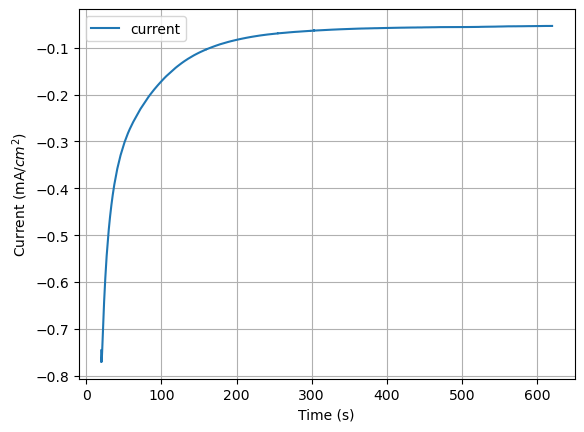

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20230907/20230907/electrodeposition_WO3_thin_films_onto_ITO_A/wo3_film_continuous_electrodeposition_A/images'


<Figure size 1500x600 with 0 Axes>

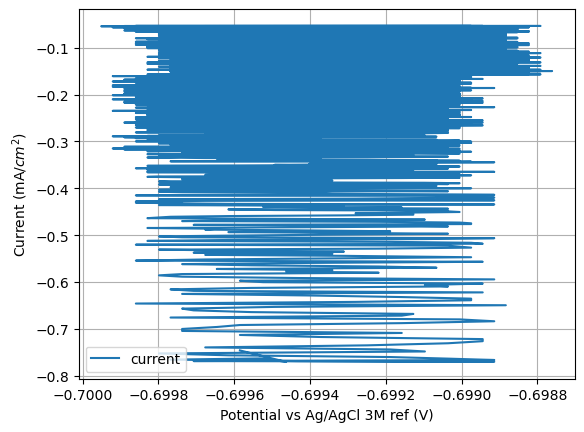

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20230907/20230907/electrodeposition_WO3_thin_films_onto_ITO_A/wo3_film_continuous_electrodeposition_A/images'


<Figure size 1500x600 with 0 Axes>

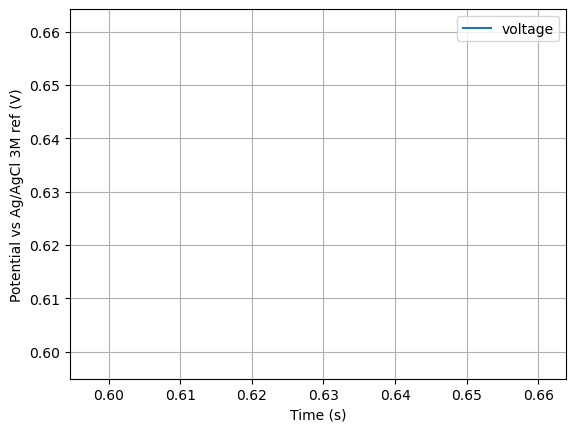

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20230907/20230907/electrodeposition_WO3_thin_films_onto_ITO_A/wo3_film_continuous_electrodeposition_A/images'


<Figure size 1500x600 with 0 Axes>

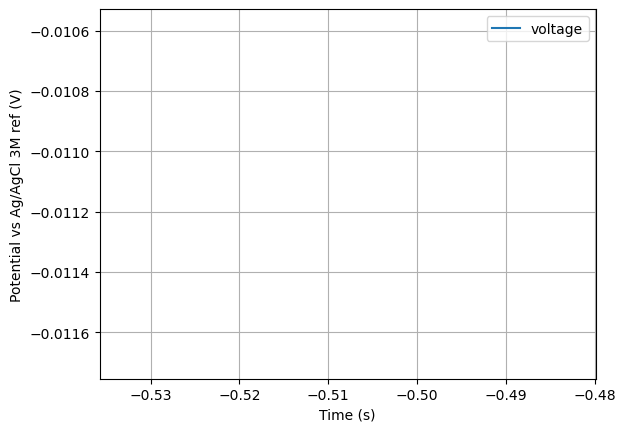

In [182]:
wo3_film_continuous_electrodeposition_A_20230907()

In [183]:
### wo3_film_continuous_electrodeposition_B

def wo3_film_continuous_electrodeposition_B_20230907():
    
    date = "20230907"
    #area cm**2
    ito_area = 2.5*2.5 #cm**2
        
    electrochromic_data_folder = os.path.join(base_folder,r"Edgar","20230907","20230907","electrodeposition_WO3_thin_films_onto_ITO_A","wo3_film_continuous_electrodeposition_B" )
    
    
    #CV_2_file = os.path.join(electrochromic_data_folder, "CV_2.txt")
    CA_2_file = os.path.join(electrochromic_data_folder, "CA_2")
    OCP_1_file =  os.path.join(electrochromic_data_folder, "OCP_1")
    OCP_3_file =  os.path.join(electrochromic_data_folder, "OCP_3")

    #optical_data_folder = r"C:\Users\esteb\electrochromicfilms\Edgar\20230906\20230906\EC_measurement_WO3_in_H2SO4_1M_1\optical_data"

    
    #read files
    CA_2 =  PotentiostatFile(file_path = CA_2_file, type_of_file = "CA", date = date, film_area = ito_area) 
    #CV_2_b = PotentiostatFile( file_path = CV_2_b_file, type_of_file = "CV", date = date ) 
    OCP_1 = PotentiostatFile( file_path = OCP_1_file, type_of_file = "OCP", date = date , film_area = ito_area) 
    OCP_3 = PotentiostatFile( file_path = OCP_3_file, type_of_file = "OCP", date = date  , film_area = ito_area) 

    #print dataframes
    print(CA_2.dataframe)
    #print(CV_2_b.dataframe)
    print(OCP_1.dataframe)
    print(OCP_3.dataframe)
    
    
    #Analysis
    CA_2.time_vs_current_analysis()
    CA_2.voltage_vs_current_analysis()
    CA_2.voltage_and_current_vs_time_analysis(ylim1 = (-0.8, 0))
    
    OCP_1.time_vs_voltage_analysis()
    OCP_3.time_vs_voltage_analysis()

['time', 'voltage', 'current']
['time', 'voltage']
['time', 'voltage']
            time   voltage   current
0      33.447059 -0.699921 -0.772119
1      33.547059 -0.699280 -0.836914
2      33.647059 -0.699036 -0.829590
3      33.747059 -0.699249 -0.831543
4      33.847059 -0.699707 -0.833496
...          ...       ...       ...
5995  632.947057 -0.699738 -0.061055
5996  633.047057 -0.699036 -0.061025
5997  633.147057 -0.699249 -0.061055
5998  633.247057 -0.699707 -0.061025
5999  633.347057 -0.699829 -0.061045

[6000 rows x 3 columns]
               time   voltage
2.505236   0.265656  0.251495
3.505236   0.265167       NaN
4.505236   0.264679       NaN
5.505236   0.253754       NaN
6.505236   0.245331       NaN
7.505236   0.241180       NaN
8.505236   0.239471       NaN
9.505236   0.239075       NaN
10.505236  0.239471       NaN
11.505236  0.240234       NaN
12.505236  0.241180       NaN
13.505236  0.242218       NaN
14.505236  0.243286       NaN
15.505236  0.244354       NaN
16.505236 

<Figure size 1500x600 with 0 Axes>

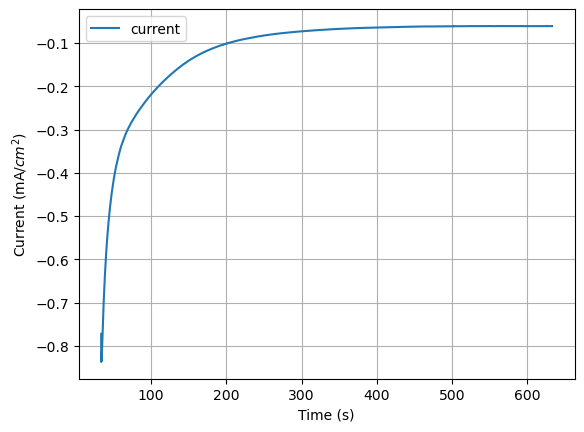

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20230907/20230907/electrodeposition_WO3_thin_films_onto_ITO_A/wo3_film_continuous_electrodeposition_B/images'


<Figure size 1500x600 with 0 Axes>

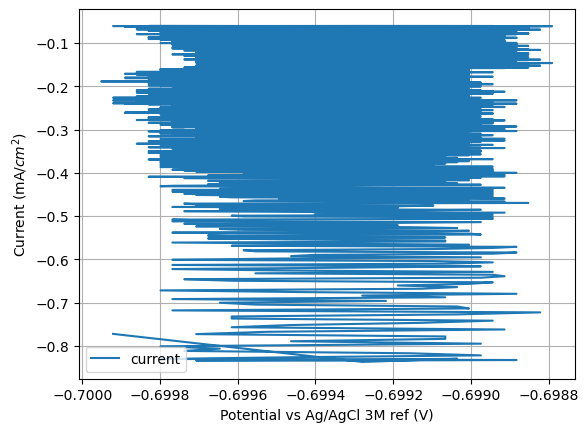

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20230907/20230907/electrodeposition_WO3_thin_films_onto_ITO_A/wo3_film_continuous_electrodeposition_B/images'


<Figure size 1500x600 with 0 Axes>

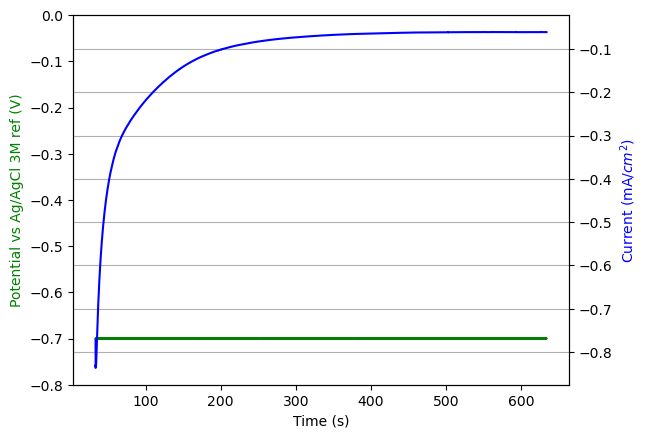

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20230907/20230907/electrodeposition_WO3_thin_films_onto_ITO_A/wo3_film_continuous_electrodeposition_B/images'


<Figure size 1500x600 with 0 Axes>

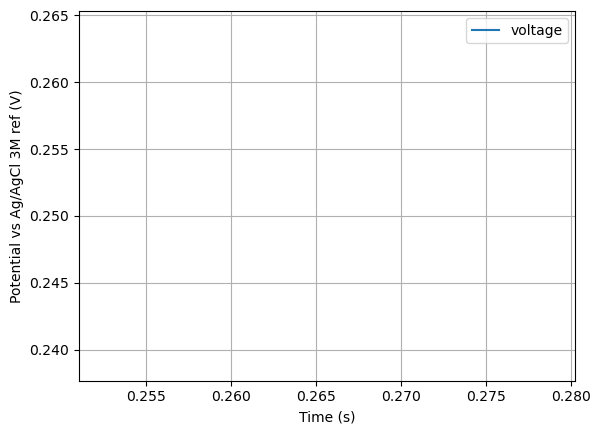

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20230907/20230907/electrodeposition_WO3_thin_films_onto_ITO_A/wo3_film_continuous_electrodeposition_B/images'


<Figure size 1500x600 with 0 Axes>

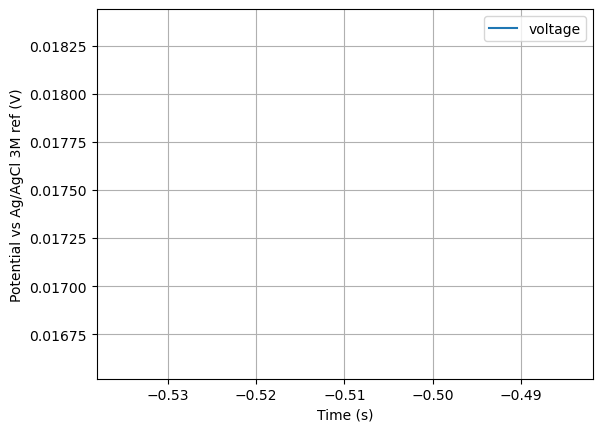

In [184]:
wo3_film_continuous_electrodeposition_B_20230907()

## 20230913
It only has a blank optical file

In [ ]:
def test_spectrometer_20230913():
    
    date = "20230913"
    #area cm**2
    ito_area = 2.5*2.5 #cm**2
        

    electrochromic_data_folder = os.path.join(base_folder,r"Edgar\20230913\20230913" )
    optical_1_file = os.path.join(optical_data_folder, "550nm.dat")
    
    #read files
    
    #
    #print dataframes
    print(CA_2.dataframe)
    #print(CV_2_b.dataframe)
    print(OCP_1.dataframe)
    print(OCP_3.dataframe)
    
    
    #Analysis
    CA_2.time_vs_current_analysis()
    CA_2.voltage_vs_current_analysis()
    
    OCP_1.time_vs_voltage_analysis()
    OCP_3.time_vs_voltage_analysis()

## 20240417

### Electrodeposition pulse potential A
No data

### Electrodeposition pulsed potential B

In [189]:
def electrodeposition_pulsed_potential_B_20240417():
    
    date = "20240417"
    #area cm**2
    ito_area = 1.2*1 #cm**2
        
    electrochromic_data_folder = os.path.join(base_folder,r"Edgar","20240417","20240417","electrodeposition_pulsed_potential_B","data" )

    pulses_0_to_1000_file = os.path.join(electrochromic_data_folder, "pulses_0_to_1000.txt")
    pulses_1000_to_2000_file = os.path.join(electrochromic_data_folder, "pulses_1000_to_2000.txt")
    pulses_2000_to_3000_file = os.path.join(electrochromic_data_folder, "pulses_2000_to_3000.txt")
    OCP_1_file =  os.path.join(electrochromic_data_folder, "OCP_1")
    OCP_3_file =  os.path.join(electrochromic_data_folder, "OCP_3")
    
    #optical_data_folder = r"C:\Users\esteb\electrochromicfilms\Edgar\20230913\20230913"
    #optical_1_file = os.path.join(optical_data_folder, "550nm.dat")
    
    #read files
    
    pulses_0_to_1000 =  PotentiostatFile(file_path = pulses_0_to_1000_file, type_of_file = "CA", date = date, film_area = ito_area )
    pulses_1000_to_2000 =  PotentiostatFile(file_path = pulses_1000_to_2000_file, type_of_file = "CA", date = date, film_area = ito_area) 
    pulses_2000_to_3000 =  PotentiostatFile(file_path = pulses_2000_to_3000_file, type_of_file = "CA", date = date, film_area = ito_area) 
    
    OCP_1 = PotentiostatFile( file_path = OCP_1_file, type_of_file = "OCP", date = date, film_area = ito_area ) 
    OCP_3 = PotentiostatFile( file_path = OCP_3_file, type_of_file = "OCP", date = date , film_area = ito_area ) 
    
    #print dataframes
    #print(pulses_0_to_1000.dataframe)
    #print(pulses_1000_to_2000.dataframe)
    #print(pulses_2000_to_3000.dataframe)
    #print(OCP_1.dataframe)
    #print(OCP_3.dataframe)
    
    
    #Analysis
    OCP_1.time_vs_voltage_analysis(ylim = (0, 1.0))
    
    pulses_0_to_1000.time_vs_current_analysis(start = 100, end=200)
    pulses_0_to_1000.voltage_vs_current_analysis(start = 100, end=200)
    pulses_0_to_1000.time_vs_voltage_analysis(start = 100, end=200)
    pulses_0_to_1000.voltage_and_current_vs_time_analysis(start = 180, end=185, ylim1 = (-1, 1))
    
    pulses_1000_to_2000.time_vs_current_analysis(start = 1700, end=1730)
    pulses_1000_to_2000.voltage_vs_current_analysis(start = 1700, end=1730)

    pulses_2000_to_3000.time_vs_current_analysis(start = 3000, end=3030)
    pulses_2000_to_3000.voltage_vs_current_analysis(start = 3000, end=3030)
    
    OCP_3.time_vs_voltage_analysis()

['time', 'voltage', 'current']
['time', 'voltage', 'current']
['time', 'voltage', 'current']
['time', 'voltage']
['time', 'voltage']
[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240417/20240417/electrodeposition_pulsed_potential_B/data/images'


<Figure size 1500x600 with 0 Axes>

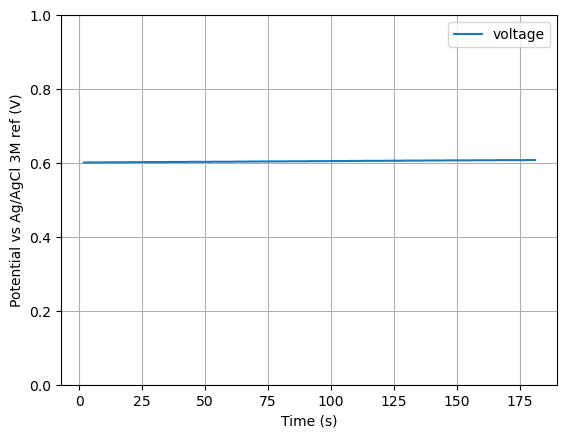

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240417/20240417/electrodeposition_pulsed_potential_B/data/images'


<Figure size 1500x600 with 0 Axes>

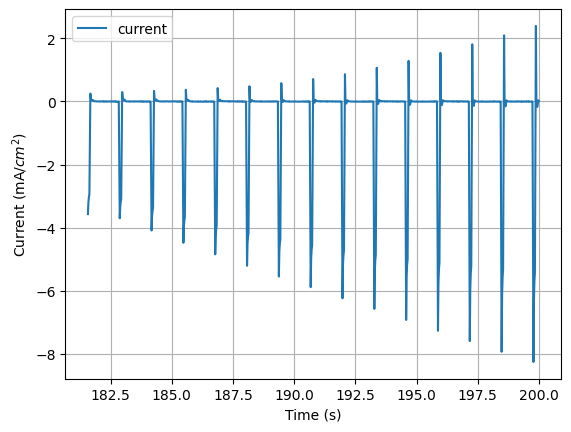

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240417/20240417/electrodeposition_pulsed_potential_B/data/images'


<Figure size 1500x600 with 0 Axes>

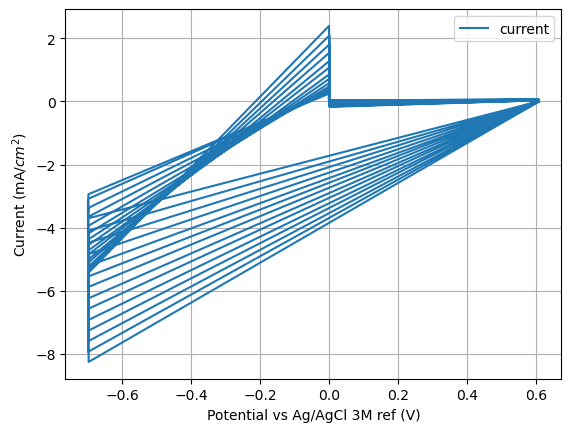

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240417/20240417/electrodeposition_pulsed_potential_B/data/images'


<Figure size 1500x600 with 0 Axes>

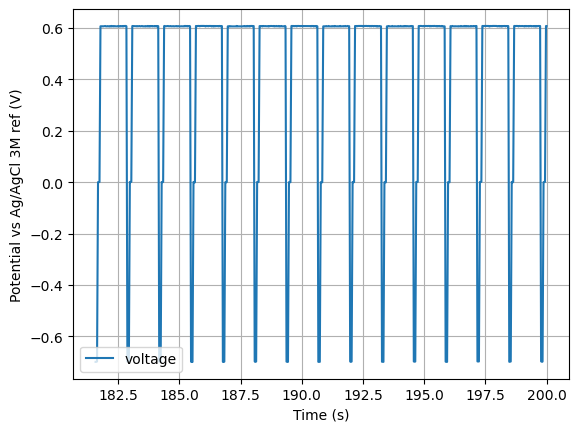

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240417/20240417/electrodeposition_pulsed_potential_B/data/images'


<Figure size 1500x600 with 0 Axes>

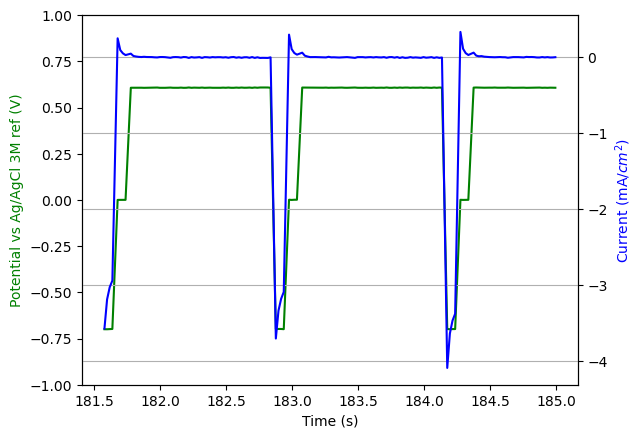

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240417/20240417/electrodeposition_pulsed_potential_B/data/images'


<Figure size 1500x600 with 0 Axes>

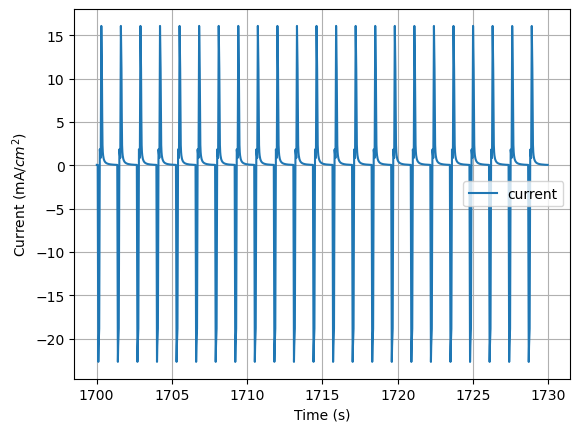

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240417/20240417/electrodeposition_pulsed_potential_B/data/images'


<Figure size 1500x600 with 0 Axes>

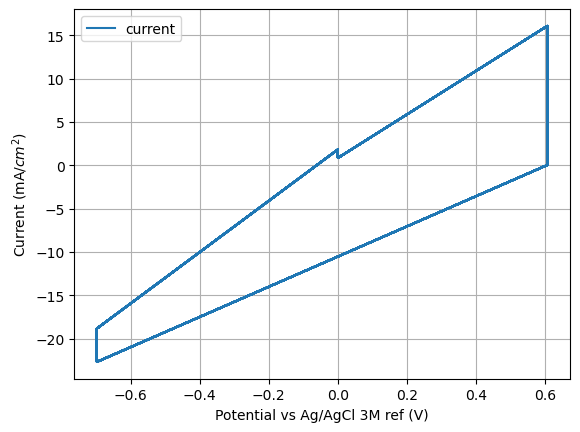

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240417/20240417/electrodeposition_pulsed_potential_B/data/images'


<Figure size 1500x600 with 0 Axes>

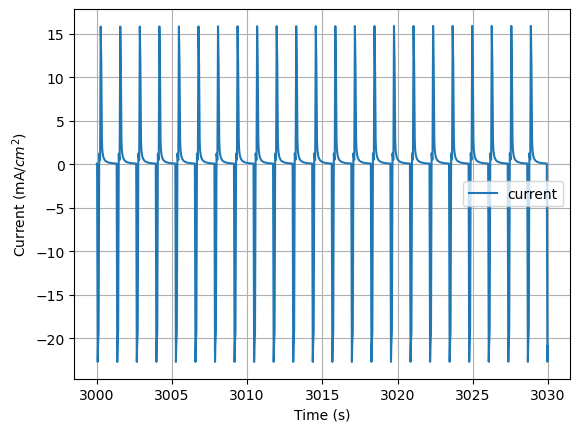

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240417/20240417/electrodeposition_pulsed_potential_B/data/images'


<Figure size 1500x600 with 0 Axes>

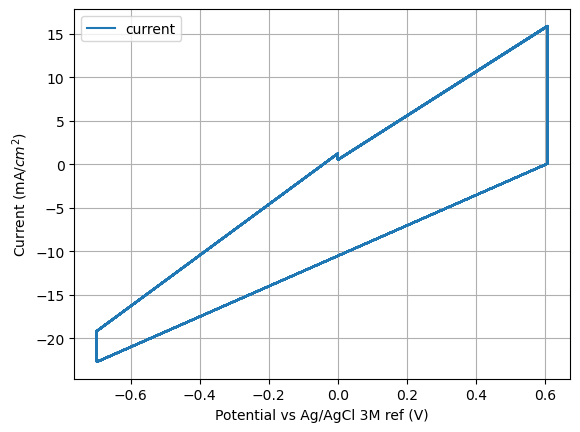

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240417/20240417/electrodeposition_pulsed_potential_B/data/images'


<Figure size 1500x600 with 0 Axes>

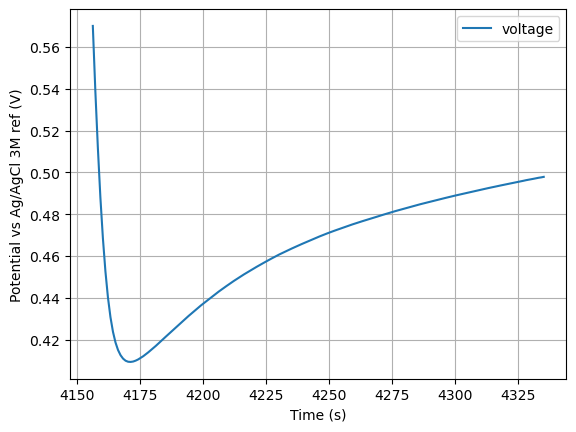

In [190]:
electrodeposition_pulsed_potential_B_20240417()

In [12]:
## 20240424

### chronoamperommetry steps

def chronoamperommetry_steps_A_20240424():
    
    date = "20240424"
    #area cm**2
    ito_area = 1.2*1 #cm**2
        
    electrochromic_data_folder = os.path.join(base_folder,"Edgar","20240424","20240424","chronoamperommetry_steps","A") 
    
    chronoamperommetry_steps_file = os.path.join(electrochromic_data_folder, "Chronoamperommetry_steps.txt")
    OCP_1_file =  os.path.join(electrochromic_data_folder, "OCP_1")
    OCP_3_file =  os.path.join(electrochromic_data_folder, "OCP_3")
    
    #optical_data_folder = r"C:\Users\esteb\electrochromicfilms\Edgar\20230913\20230913"
    #optical_1_file = os.path.join(optical_data_folder, "550nm.dat")
    
    #read files
    
    chronoamperommetry_steps =  PotentiostatFile(file_path = chronoamperommetry_steps_file, type_of_file = "CA+", date = date, film_area = ito_area) 
    OCP_1 = PotentiostatFile( file_path = OCP_1_file, type_of_file = "OCP", date = date, film_area = ito_area ) 
    OCP_3 = PotentiostatFile( file_path = OCP_3_file, type_of_file = "OCP", date = date, film_area = ito_area  ) 
    
    #print dataframes
    
    #print(chronoamperommetry_steps.dataframe)
    #print(OCP_1.dataframe)
    #print(OCP_3.dataframe)
    
    
    #Analysis
    OCP_1.time_vs_voltage_analysis()
    
    #chronoamperommetry_steps.time_vs_current_analysis()
    chronoamperommetry_steps.voltage_vs_current_analysis()
    #chronoamperommetry_steps.time_vs_voltage_analysis()
    chronoamperommetry_steps.current_and_transmittance_vs_time_analysis()
    #chronoamperommetry_steps.custom_analysis(x = "time", y= "transmittance")
    
    OCP_3.time_vs_voltage_analysis()

['time', 'voltage', 'current', 'transmittance']
No max and min transmittance info provided
self.max_transmittance=2.8741455078125self.min_transmittance=0.380401611328125transmittance_range=2.493743896484375
['time', 'voltage']
['time', 'voltage']
[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240424/20240424/chronoamperommetry_steps/A/images'


NameError: name 'y' is not defined

<Figure size 1500x600 with 0 Axes>

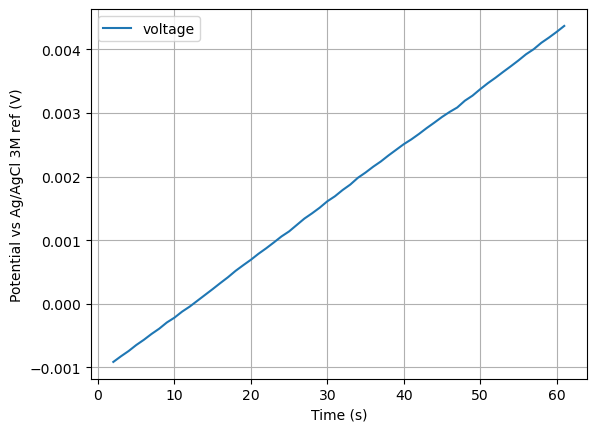

In [13]:
chronoamperommetry_steps_A_20240424()

In [ ]:
## 20240424

### chronoamperommetry steps

def chronoamperommetry_steps_B_20240424():
    
    date = "20240424"
    #area cm**2
    ito_area = 1.2*1 #cm**2
    
    electrochromic_data_folder = os.path.join(base_folder, r"Edgar","20240424","20240424","chronoamperommetry_steps","B")
    
    
    chronoamperommetry_steps_file = os.path.join(electrochromic_data_folder, "Chronoamperommetry_steps.txt")
    OCP_1_file =  os.path.join(electrochromic_data_folder, "OCP_1")
    OCP_3_file =  os.path.join(electrochromic_data_folder, "OCP_3")
    
    #optical_data_folder = r"C:\Users\esteb\electrochromicfilms\Edgar\20230913\20230913"
    #optical_1_file = os.path.join(optical_data_folder, "550nm.dat")
    
    #read files
    
    
    OCP_1 = PotentiostatFile( file_path = OCP_1_file, type_of_file = "OCP", date = date, film_area = ito_area ) 
    chronoamperommetry_steps =  PotentiostatFile(file_path = chronoamperommetry_steps_file, type_of_file = "CA+", date = date, film_area = ito_area) 
    OCP_3 = PotentiostatFile( file_path = OCP_3_file, type_of_file = "OCP", date = date, film_area = ito_area  ) 
    
    #print dataframes
    
    #print(chronoamperommetry_steps.dataframe)
    #print(OCP_1.dataframe)
    #print(OCP_3.dataframe)
    
    
    #Analysis
    OCP_1.time_vs_voltage_analysis()
    
    #chronoamperommetry_steps.time_vs_current_analysis()
    chronoamperommetry_steps.voltage_vs_current_analysis()
    chronoamperommetry_steps.voltage_and_current_vs_time_analysis()
    #chronoamperommetry_steps.time_vs_voltage_analysis()
    chronoamperommetry_steps.current_and_transmittance_vs_time_analysis()
    #chronoamperommetry_steps.custom_analysis(x = "time", y= "transmittance")
    
    OCP_3.time_vs_voltage_analysis()

In [ ]:
chronoamperommetry_steps_B_20240424()

In [41]:
def cv_analysis(OCP_0_file, OCP_1_file, CV_2_file, OCP_3_file, date, film_area):
    
    #read ocp info 
    OCP_0 = PotentiostatFile( file_path = OCP_0_file, type_of_file = "OCP+", date = date, film_area = film_area ) 
    OCP_1 = PotentiostatFile( file_path = OCP_1_file, type_of_file = "OCP+", date = date, film_area = film_area ) 
    OCP_3 = PotentiostatFile( file_path = OCP_3_file, type_of_file = "OCP+", date = date, film_area = film_area  ) 
    
    #get maximum and minimum transmittance, only electrolite
    min_tx_electrolite = OCP_0.get_min_transmittance()
    max_tx_electrolite = OCP_0.get_max_transmittance()
    
    #get maximum and minimum transmittance with sample
    min_tx_sample = OCP_1.get_min_transmittance()
    max_tx_sample = OCP_1.get_max_transmittance()
    
    #read cv info 
    CV_2 =  PotentiostatFile(file_path = CV_2_file, type_of_file = "CV+", date = date, film_area = film_area, min_transmittance=min_tx_sample, max_transmittance = max_tx_sample) 
    
    #analysis
    OCP_0.voltage_and_transmittance_vs_time_analysis(ylim1 = (0, 4.0))
    OCP_1.voltage_and_transmittance_vs_time_analysis(ylim1 = (0, 4.0))
    
    CV_2.voltage_vs_current_analysis()
    CV_2.voltage_and_current_vs_time_analysis(start=500, end= 800)
    CV_2.current_and_transmittance_vs_time_analysis()
    
    OCP_3.voltage_and_transmittance_vs_time_analysis( ylim1 = (0, 4.0))

In [42]:
## 20240424

### cv A

def CV_20240424_A():
    
    date = "20240424"
    #area cm**2
    film_area = 1.0*1 #cm**2
    
    electrochromic_data_folder = os.path.join(base_folder, r"Edgar","20240424","20240424","CV","sample-20240417_A")
    
    
    CV_2_file = os.path.join(electrochromic_data_folder, "CV_2")
    
    OCP_0_file =  os.path.join(electrochromic_data_folder, "OCP_0")
    OCP_1_file =  os.path.join(electrochromic_data_folder, "OCP_1")
    OCP_3_file =  os.path.join(electrochromic_data_folder, "OCP_3")
    
    #optical_data_folder = r"C:\Users\esteb\electrochromicfilms\Edgar\20230913\20230913"
    #optical_1_file = os.path.join(optical_data_folder, "550nm.dat")
    
    #read files
    #print dataframes
    
    #print(chronoamperommetry_steps.dataframe)
    #print(OCP_1.dataframe)
    #print(OCP_3.dataframe)
    
    
    #Analysis
    
    cv_analysis(OCP_0_file, OCP_1_file, CV_2_file, OCP_3_file, date, film_area)

['time', 'voltage', 'transmittance']
['time', 'voltage', 'transmittance']
['time', 'voltage', 'transmittance']
['time', 'scan', 'voltage', 'current', 'transmittance', 'Q+', 'Q-']
self.max_transmittance=3.13446044921875self.min_transmittance=0.0498046875transmittance_range=3.08465576171875
[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240424/20240424/CV/sample-20240417_A/images'


<Figure size 1500x600 with 0 Axes>

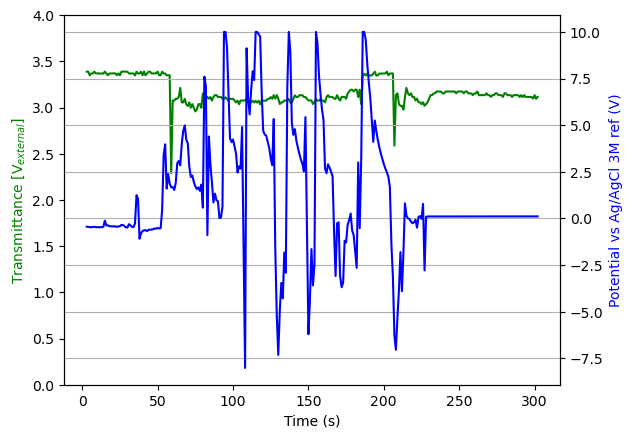

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240424/20240424/CV/sample-20240417_A/images'


<Figure size 1500x600 with 0 Axes>

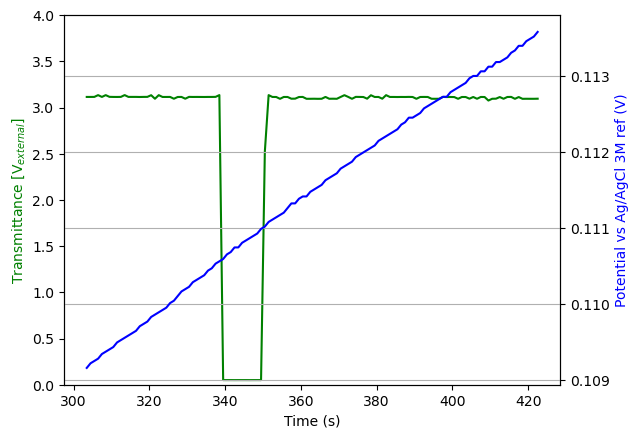

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240424/20240424/CV/sample-20240417_A/images'


<Figure size 1500x600 with 0 Axes>

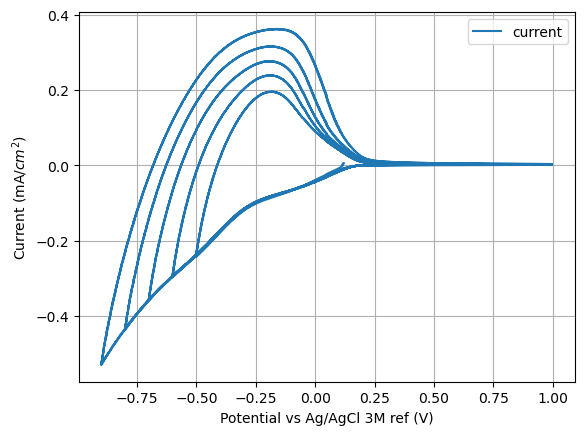

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240424/20240424/CV/sample-20240417_A/images'


<Figure size 1500x600 with 0 Axes>

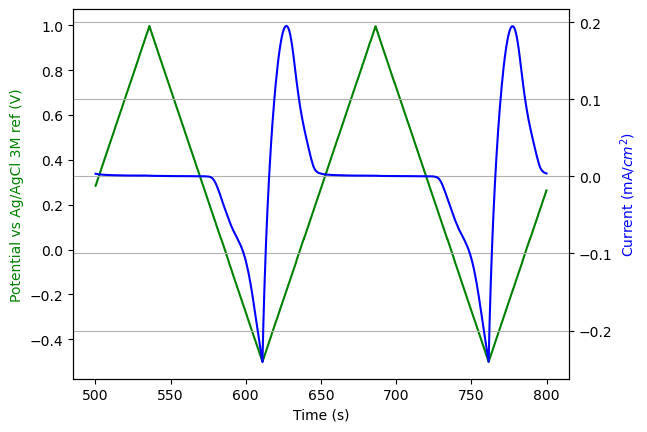

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240424/20240424/CV/sample-20240417_A/images'


<Figure size 1500x600 with 0 Axes>

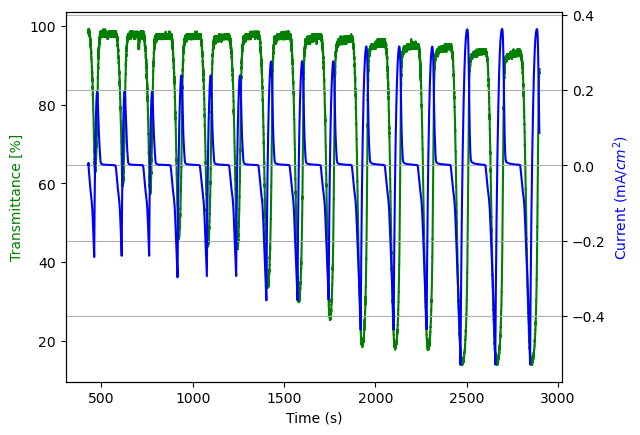

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240424/20240424/CV/sample-20240417_A/images'


<Figure size 1500x600 with 0 Axes>

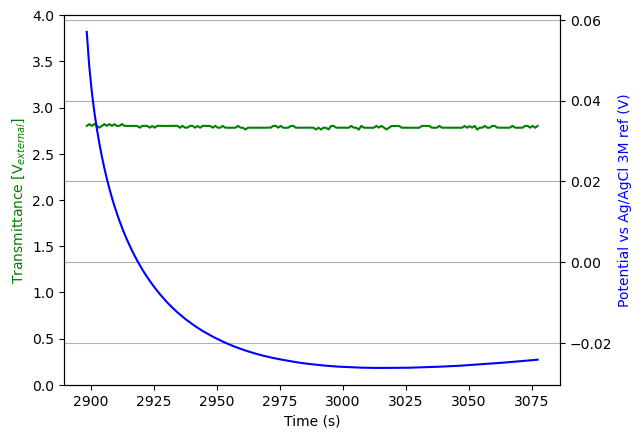

In [44]:
CV_20240424_A()

## 20240424

### CV B

### Analysis of 
- Leaving and entering charge
- Aparent impedance
- Current vs derivative of voltage
- voltage vs derivative of current
- Fourier analysis
- Modelling 

In [235]:
def CV_20240424_A_analysis_2():

    def saveimage2(analysis_name):
            dirname = os.path.join(base_folder, "report", "20240424", "images", "impedance_analysis")
            try:
                os.makedirs(dirname)
            except Exception as e:
                print(e)
            
            
            filename = os.path.join(dirname, f"{analysis_name}.png")
            
            
            
            plt.savefig(filename)
    
    date = "20240424"
    #area cm**2
    film_area = 1.0*1 #cm**2
    
    electrochromic_data_folder = os.path.join(base_folder, r"Edgar","20240424","20240424","CV","sample-20240417_A")
    
    CV_2_file = os.path.join(electrochromic_data_folder, "CV_2")
    
    OCP_0_file =  os.path.join(electrochromic_data_folder, "OCP_0")
    OCP_1_file =  os.path.join(electrochromic_data_folder, "OCP_1")
    OCP_3_file =  os.path.join(electrochromic_data_folder, "OCP_3")

    #
    CV_2 = PotentiostatFile( file_path = CV_2_file, type_of_file = "CV+", date = date, film_area = film_area ) 
    OCP_0 = PotentiostatFile( file_path = OCP_0_file, type_of_file = "OCP+", date = date, film_area = film_area ) 
    OCP_1 = PotentiostatFile( file_path = OCP_1_file, type_of_file = "OCP+", date = date, film_area = film_area ) 
    OCP_3 = PotentiostatFile( file_path = OCP_3_file, type_of_file = "OCP+", date = date, film_area = film_area  ) 

    CV_2_df = CV_2.dataframe
    OCP_0_df = OCP_0.dataframe
    OCP_1_df = OCP_1.dataframe
    OCP_3_df = OCP_3.dataframe

    
    #Leaving and entering charge
    #calculate time difference
    df = CV_2_df
    df["current"] = df["current"]/1000 * film_area
    #df['time'] = pd.to_datetime(df['time'])
    df.sort_values('time', inplace=True)
    df['time_delta'] = df['time'].diff()

    #now we multiply the current times the time delta
    df["charge"] = df["current"] * df["time_delta"]
    df["total_charge"] = df['charge'].cumsum()

    plt.figure()
    plt.plot(df["time"], df["current"])
    plt.grid()
    analysis_name = "Current vs time"
    saveimage2(analysis_name)
    plt.show()
    
    plt.figure()
    plt.plot(df["time"], df["total_charge"])
    plt.plot(df["time"], df["transmittance"])
    plt.grid()
    analysis_name = "Total charge and transmittance vs time"
    saveimage2(analysis_name)
    plt.show()
    
    #Aparent impedance
    # Z = V/I
    df["impedance"] = df["voltage"] / (df["current"]/1000 * film_area) #ohms

    plt.figure()
    plt.plot(df["time"], df["impedance"])
    #plt.plot(df["time"], df["transmittance"])
    plt.grid()
    analysis_name = "Impedance and transmittance vs time"
    saveimage2(analysis_name)
    plt.xlim(500,650)
    plt.ylim(-20,14)
    plt.show()
    
    # V = L di/dt
    df["current_derivative"] = df['current'].diff()
    df["inductance"] = df["voltage"] / df["current_derivative"] #megahenries

    plt.figure()
    plt.plot(df["time"], df["inductance"])
    #plt.plot(df["time"], df["transmittance"])
    plt.grid()
    analysis_name = "Inductance and transmittance vs time"
    saveimage2(analysis_name)
    plt.xlim(500,650)
    plt.show()

    # I = C dV/dt

    df["voltage_derivative"] = df['voltage'].diff()
    df["capacitance"] = df["current"] / df["voltage_derivative"] #farads

    plt.figure()
    plt.plot(df["time"], df["capacitance"])
    #plt.plot(df["time"], df["transmittance"])
    plt.grid()
    analysis_name = "Capacitance and transmittance vs time"
    saveimage2(analysis_name)
    plt.xlim(500,700)
    plt.ylim(-0.2,0.2)
    plt.show()

    #impedance, inductance and capacitance

    # Create the first plot
    plt.figure()
    plt.subplot(3, 1, 1)  # (rows, columns, panel number)
    plt.plot(df["time"], df["impedance"])
    plt.title('Impedance')
    
    # Create the second plot
    plt.subplot(3, 1, 2)
    plt.plot(df["time"], df["inductance"])
    plt.title('Inductance')

    # Create the second plot
    plt.subplot(3, 1, 3)
    plt.plot(df["time"], df["capacitance"])
    plt.title("Capacitance")
    
    plt.tight_layout()  # Adjust layout to prevent overlapping
    saveimage2(analysis_name)
    plt.show()

    #impedance, inductance and capacitance LIMITED TIME

    # Create the first plot
    plt.figure()
    plt.subplot(3, 1, 1)  # (rows, columns, panel number)
    plt.plot(df["time"], df["impedance"])
    plt.xlim(500, 750)
    plt.ylim(-3E9, 3E9)
    plt.ylabel("Impedance ($\Omega$)")
    #plt.title('Impedance')
    
    # Create the second plot
    plt.subplot(3, 1, 2)
    plt.plot(df["time"], df["inductance"])
    plt.xlim(500, 750)
    #plt.xlim(500, 750)
    #plt.title('Inductance')
    plt.ylabel("Inductance (H)")

    # Create the second plot
    plt.subplot(3, 1, 3)
    plt.plot(df["time"], df["capacitance"])
    plt.xlabel("Time (s)")
    plt.ylabel("Capacitance (F)")
    
    
    plt.tight_layout()  # Adjust layout to prevent overlapping
    plt.xlim(500, 750)
    plt.ylim(-0.2, 0.2)
    analysis_name = "Omega, L, C vs time"
    #plt.caption("$\Omega$, L and C vs time")
    dirname = os.path.join(base_folder, "report", "20240424", "images", "impedance_analysis")
    saveimage2(analysis_name)
    plt.show()

['time', 'scan', 'voltage', 'current', 'transmittance', 'Q+', 'Q-']
No max and min transmittance info provided
self.max_transmittance=3.1103515625self.min_transmittance=0.477569580078125transmittance_range=2.632781982421875
['time', 'voltage', 'transmittance']
['time', 'voltage', 'transmittance']
['time', 'voltage', 'transmittance']
[Errno 17] File exists: '/home/vinicio/electrochromicfilms/report/20240424/images/impedance_analysis'


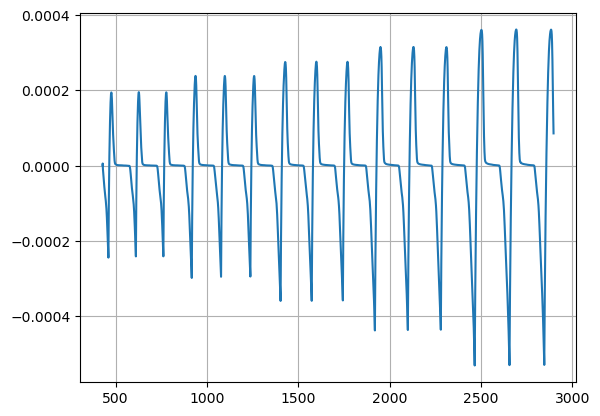

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/report/20240424/images/impedance_analysis'


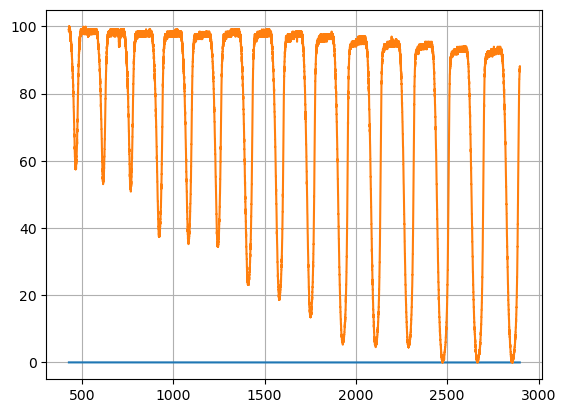

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/report/20240424/images/impedance_analysis'


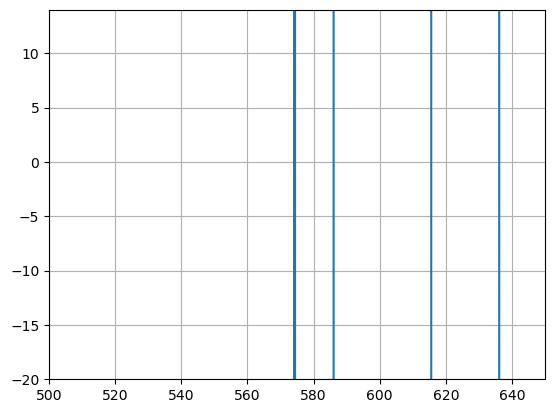

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/report/20240424/images/impedance_analysis'


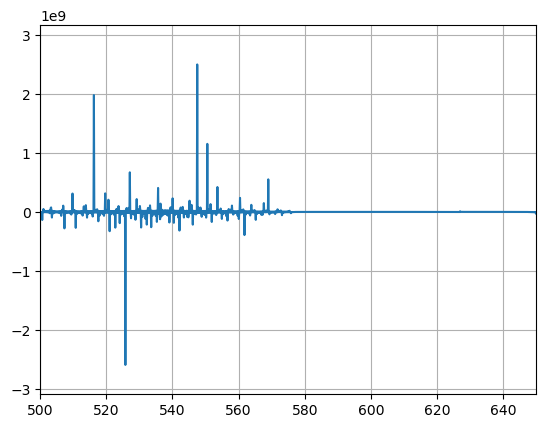

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/report/20240424/images/impedance_analysis'


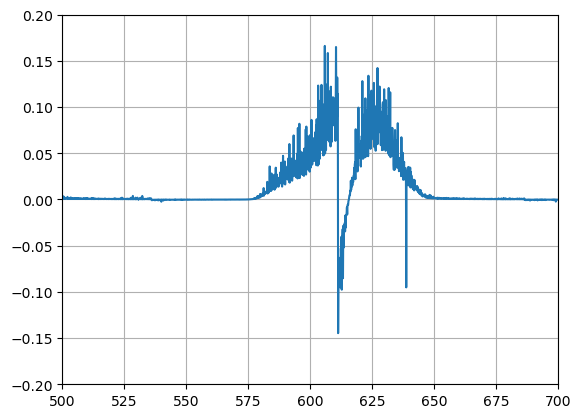

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/report/20240424/images/impedance_analysis'


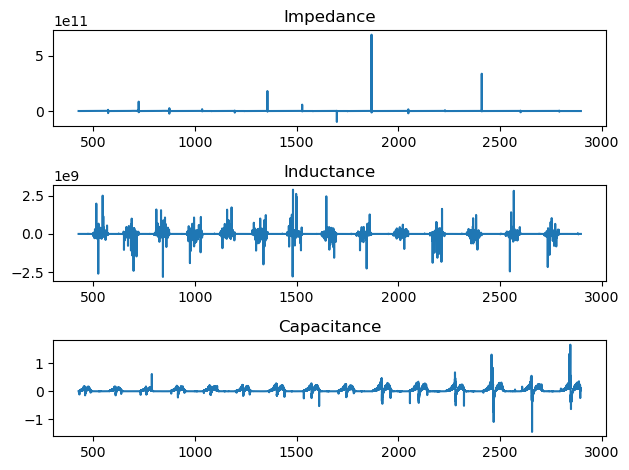

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/report/20240424/images/impedance_analysis'


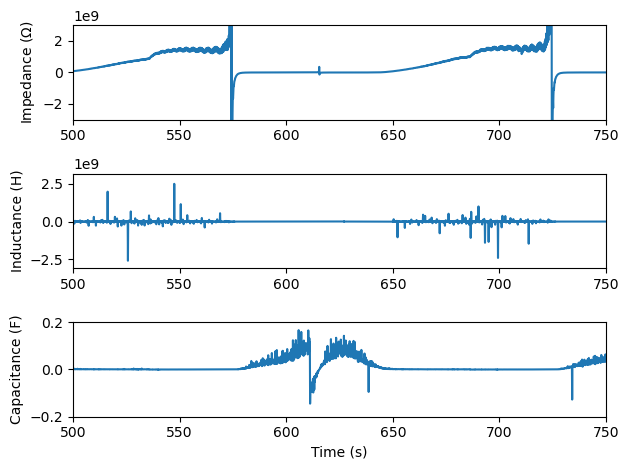

In [237]:
CV_20240424_A_analysis_2()

In [286]:
def CV_20240424_A_analysis_3():

    def saveimage2(analysis_name):
            dirname = os.path.join(base_folder, "report", "20240424", "images", "energy_analysis")
            try:
                os.makedirs(dirname)
            except Exception as e:
                print(e)
            
            filename = os.path.join(dirname, f"{analysis_name} .png")
            
            
            plt.savefig(filename)
    
    date = "20240424"
    #area cm**2
    film_area = 1.0*1 #cm**2
    
    electrochromic_data_folder = os.path.join(base_folder, r"Edgar","20240424","20240424","CV","sample-20240417_A")
    
    CV_2_file = os.path.join(electrochromic_data_folder, "CV_2")
    
    OCP_0_file =  os.path.join(electrochromic_data_folder, "OCP_0")
    OCP_1_file =  os.path.join(electrochromic_data_folder, "OCP_1")
    OCP_3_file =  os.path.join(electrochromic_data_folder, "OCP_3")

    #
    CV_2 = PotentiostatFile( file_path = CV_2_file, type_of_file = "CV+", date = date, film_area = film_area ) 
    OCP_0 = PotentiostatFile( file_path = OCP_0_file, type_of_file = "OCP+", date = date, film_area = film_area ) 
    OCP_1 = PotentiostatFile( file_path = OCP_1_file, type_of_file = "OCP+", date = date, film_area = film_area ) 
    OCP_3 = PotentiostatFile( file_path = OCP_3_file, type_of_file = "OCP+", date = date, film_area = film_area  ) 

    CV_2_df = CV_2.dataframe
    OCP_0_df = OCP_0.dataframe
    OCP_1_df = OCP_1.dataframe
    OCP_3_df = OCP_3.dataframe

    
    #Leaving and entering charge
    #calculate time difference
    df = CV_2_df
    #print(df)

    #calculate current 
    df["current"] = df["current"]/1000 * film_area
    #df['time'] = pd.to_datetime(df['time'])
    df.sort_values('time', inplace=True)
    df['time_delta'] = df['time'].diff()

    #now we multiply the current times the time delta
    df["charge"] = df["current"] * df["time_delta"]
    df["total_charge"] = df['charge'].cumsum()

    #calculate power
    df["power"] = df["current"] * df["voltage"]
    
    plt.figure(figsize =(8, 5))
    plt.plot(df["time"], df["power"])
    #plt.plot(df["time"], df["transmittance"])
    plt.grid()
    analysis_name = "Power vs time"
    #saveimage2(analysis_name)
    #plt.xlim(500,650)
    #plt.ylim(-20,14)
    plt.xlabel("Time (s)")
    plt.ylabel("Power (W)")
    print(analysis_name)
    saveimage2(analysis_name)
    plt.show()

    #Now we are going to calculate the energy that enters, exits the system
    #Instantaneous and total 
    #calculate power
    df["instant_energy"] = df["power"] * df["time_delta"]
    
    plt.figure()
    plt.plot(df["time"], df["instant_energy"])
    #plt.plot(df["time"], df["transmittance"])
    plt.grid()
    analysis_name = "Instantaneous energy vs time"
    #saveimage2(analysis_name)
    #plt.xlim(500,650)
    #plt.ylim(-20,14)
    plt.xlabel("Time (s)")
    plt.ylabel("Instantaneous energy (J)")
    print(analysis_name)
    saveimage2(analysis_name)
    plt.show()

    #total energy
    df["total_energy"] = df["power"].cumsum()
    
    plt.figure()
    
    # Create figure and primary axis
    fig, ax1 = plt.subplots()
    x_val = df["time"]
    y_val = df["total_energy"]
    y2_val = df["transmittance"]
    
    # Plot data on primary axis
    ax1.plot(x_val, y_val, 'b')
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Total energy (J)", color='b')
    
    # Create secondary axis
    ax2 = ax1.twinx()
    
    # Plot data on secondary axis
    ax2.plot(x_val, y2_val, 'g')
    ax2.set_ylabel("Transmittance [%]", color='g')
                   
    #plt.plot(df["time"], df["transmittance"])
    plt.grid()
    analysis_name = "Total energy applied and transmittance vs time"
    
    #plt.xlim(500,650)
    #plt.ylim(-20,14)
    
    print(analysis_name)
    saveimage2(analysis_name)
    plt.show()

    #############################################
    # Create figure and primary axis
    
    fig, ax1 = plt.subplots(figsize=(8, 5))
    x_val = df["time"]
    y_val = df["total_energy"]
    y2_val = df["total_charge"]
    
    # Plot data on primary axis
    ax1.plot(x_val, y_val, 'b')
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Total energy (J)", color='b')
    
    # Create secondary axis
    ax2 = ax1.twinx()
    
    # Plot data on secondary axis
    ax2.plot(x_val, y2_val, 'g')
    ax2.set_ylabel("Total charge [C]", color='g')
                   
    #plt.plot(df["time"], df["transmittance"])
    plt.grid()
    analysis_name = "Total energy applied and total charge inserted vs time"
    
    #plt.xlim(500,650)
    #plt.ylim(-20,14)
    
    print(analysis_name)
    saveimage2(analysis_name)
    plt.show()
    

['time', 'scan', 'voltage', 'current', 'transmittance', 'Q+', 'Q-']
No max and min transmittance info provided
self.max_transmittance=3.1103515625self.min_transmittance=0.477569580078125transmittance_range=2.632781982421875
['time', 'voltage', 'transmittance']
['time', 'voltage', 'transmittance']
['time', 'voltage', 'transmittance']
Power vs time
[Errno 17] File exists: '/home/vinicio/electrochromicfilms/report/20240424/images/energy_analysis'


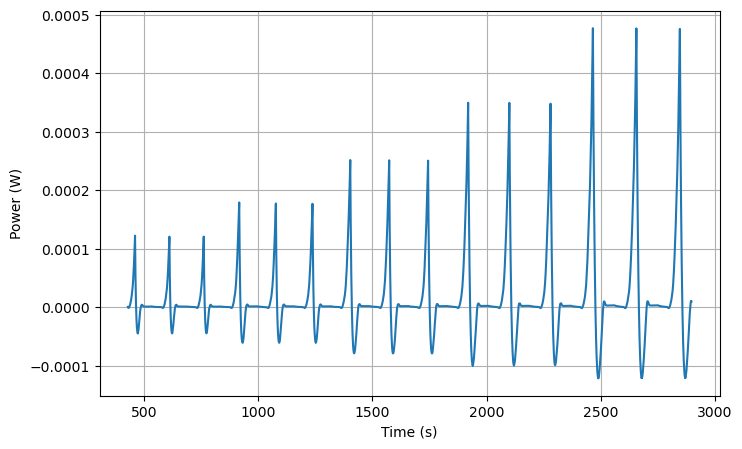

Instantaneous energy vs time
[Errno 17] File exists: '/home/vinicio/electrochromicfilms/report/20240424/images/energy_analysis'


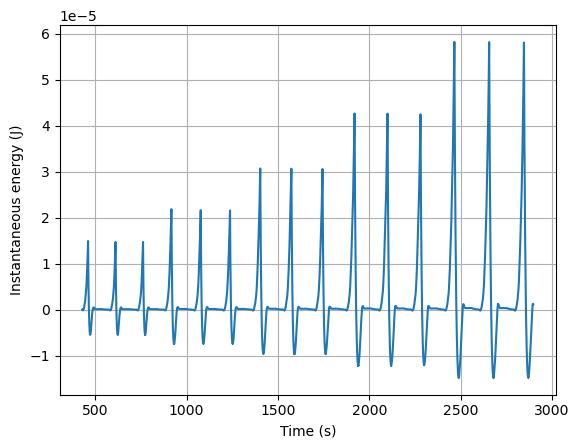

Total energy applied and transmittance vs time
[Errno 17] File exists: '/home/vinicio/electrochromicfilms/report/20240424/images/energy_analysis'


<Figure size 640x480 with 0 Axes>

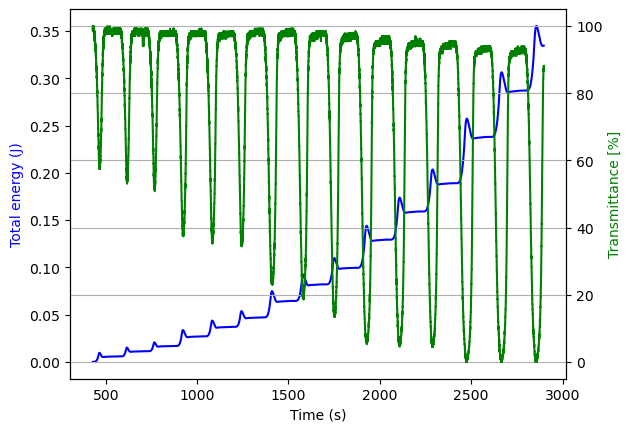

Total energy applied and total charge inserted vs time
[Errno 17] File exists: '/home/vinicio/electrochromicfilms/report/20240424/images/energy_analysis'


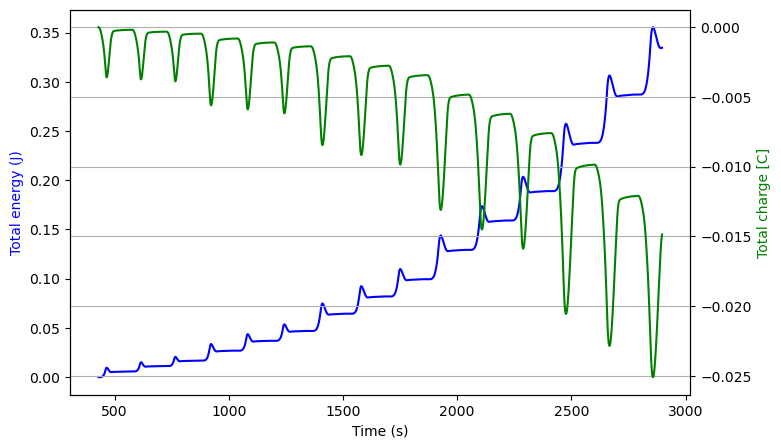

In [287]:
CV_20240424_A_analysis_3()

In [ ]:
def CV_20240424_A_analysis_4():

    def saveimage2(analysis_name):
            dirname = os.path.join(base_folder, "report", "20240424", "images", "energy_analysis")
            try:
                os.makedirs(dirname)
            except Exception as e:
                print(e)
            
            filename = os.path.join(dirname, f"{analysis_name} .png")
            
            
            plt.savefig(filename)
    
    date = "20240424"
    #area cm**2
    film_area = 1.0*1 #cm**2
    
    electrochromic_data_folder = os.path.join(base_folder, r"Edgar","20240424","20240424","CV","sample-20240417_A")
    
    CV_2_file = os.path.join(electrochromic_data_folder, "CV_2")
    
    OCP_0_file =  os.path.join(electrochromic_data_folder, "OCP_0")
    OCP_1_file =  os.path.join(electrochromic_data_folder, "OCP_1")
    OCP_3_file =  os.path.join(electrochromic_data_folder, "OCP_3")

    #
    CV_2 = PotentiostatFile( file_path = CV_2_file, type_of_file = "CV+", date = date, film_area = film_area ) 
    OCP_0 = PotentiostatFile( file_path = OCP_0_file, type_of_file = "OCP+", date = date, film_area = film_area ) 
    OCP_1 = PotentiostatFile( file_path = OCP_1_file, type_of_file = "OCP+", date = date, film_area = film_area ) 
    OCP_3 = PotentiostatFile( file_path = OCP_3_file, type_of_file = "OCP+", date = date, film_area = film_area  ) 

    CV_2_df = CV_2.dataframe
    OCP_0_df = OCP_0.dataframe
    OCP_1_df = OCP_1.dataframe
    OCP_3_df = OCP_3.dataframe

    
    #Leaving and entering charge
    #calculate time difference
    df = CV_2_df
    #print(df)

    #calculate current 
    df["current"] = df["current"]/1000 * film_area
    #df['time'] = pd.to_datetime(df['time'])
    df.sort_values('time', inplace=True)
    df['time_delta'] = df['time'].diff()

    #now we multiply the current times the time delta
    df["charge"] = df["current"] * df["time_delta"]
    df["total_charge"] = df['charge'].cumsum()

    #calculate power
    df["power"] = df["current"] * df["voltage"]
    
   

    #Now we are going to calculate the energy that enters, exits the system
    #Instantaneous and total 
    #calculate power
    df["instant_energy"] = df["power"] * df["time_delta"]
    

    #total energy
    df["total_energy"] = df["power"].cumsum()
    
    
    #plt.xlim(500,650)
    #plt.ylim(-20,14)
    
    print(analysis_name)
    saveimage2(analysis_name)
    plt.show()

    #############################################
    # Create figure and primary axis
    
    fig, ax1 = plt.subplots(figsize=(8, 5))
    x_val = df["time"]
    y_val = df["total_energy"]
    y2_val = df["total_charge"]
    
    # Plot data on primary axis
    ax1.plot(x_val, y_val, 'b')
    ax1.set_xlabel("Time (s)")
    ax1.set_ylabel("Total energy (J)", color='b')
    
    # Create secondary axis
    ax2 = ax1.twinx()
    
    # Plot data on secondary axis
    ax2.plot(x_val, y2_val, 'g')
    ax2.set_ylabel("Total charge [C]", color='g')
                   
    #plt.plot(df["time"], df["transmittance"])
    plt.grid()
    analysis_name = "Total energy applied and total charge inserted vs time"
    
    #plt.xlim(500,650)
    #plt.ylim(-20,14)
    
    print(analysis_name)
    saveimage2(analysis_name)
    plt.show()
    

In [131]:
## 20240424

### cv B

def CV_20240424_B():
    
    date = "20240424"
    #area cm**2
    film_area = 1.0*1 #cm**2
    
    electrochromic_data_folder = os.path.join(base_folder, r"Edgar","20240424","20240424","CV","sample-20240417_B")
    
    
    CV_2_file = os.path.join(electrochromic_data_folder, "CV_2")
    
    OCP_0_file =  os.path.join(electrochromic_data_folder, "OCP_0")
    OCP_1_file =  os.path.join(electrochromic_data_folder, "OCP_1")
    OCP_3_file =  os.path.join(electrochromic_data_folder, "OCP_3")
    
    #optical_data_folder = r"C:\Users\esteb\electrochromicfilms\Edgar\20230913\20230913"
    #optical_1_file = os.path.join(optical_data_folder, "550nm.dat")
    
    #read files
    #print dataframes
    
    #print(chronoamperommetry_steps.dataframe)
    #print(OCP_1.dataframe)
    #print(OCP_3.dataframe)
    
    
    #Analysis
    
    cv_analysis(OCP_0_file, OCP_1_file, CV_2_file, OCP_3_file, date, film_area)

['time', 'voltage', 'transmittance']
['time', 'voltage', 'transmittance']
['time', 'voltage', 'transmittance']
['time', 'scan', 'voltage', 'current', 'transmittance', 'Q+', 'Q-']
self.max_transmittance=3.46588134765625self.min_transmittance=0.049896240234375transmittance_range=3.415985107421875
[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240424/20240424/CV/sample-20240417_B/images'


<Figure size 1500x600 with 0 Axes>

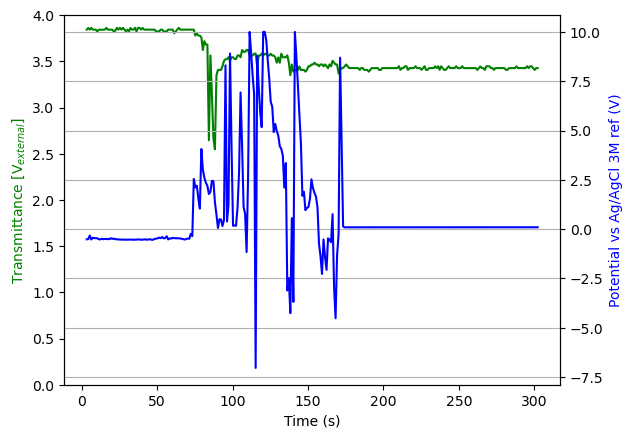

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240424/20240424/CV/sample-20240417_B/images'


<Figure size 1500x600 with 0 Axes>

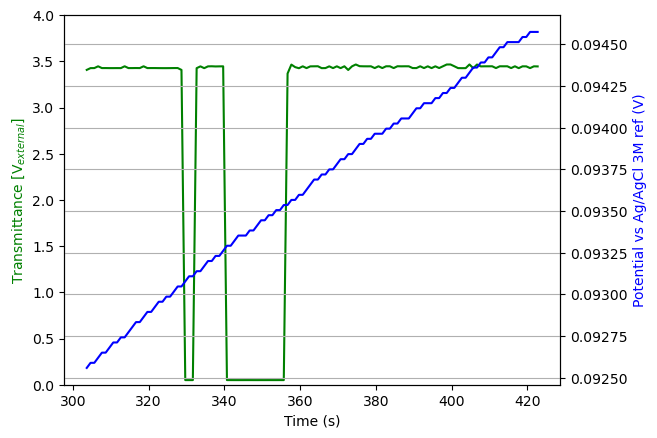

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240424/20240424/CV/sample-20240417_B/images'


<Figure size 1500x600 with 0 Axes>

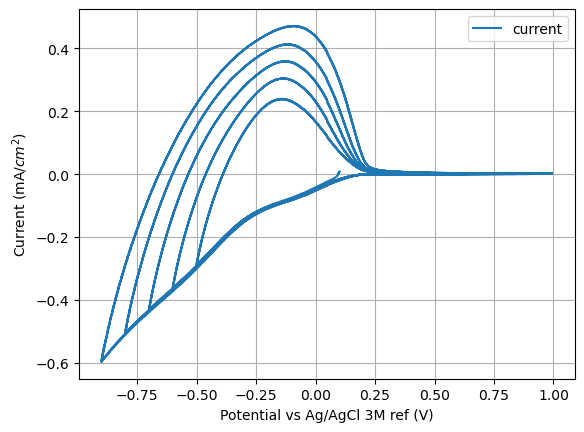

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240424/20240424/CV/sample-20240417_B/images'


<Figure size 1500x600 with 0 Axes>

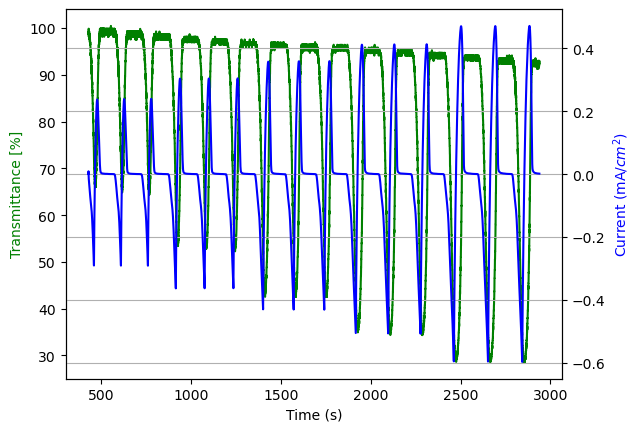

[Errno 17] File exists: '/home/vinicio/electrochromicfilms/Edgar/20240424/20240424/CV/sample-20240417_B/images'


<Figure size 1500x600 with 0 Axes>

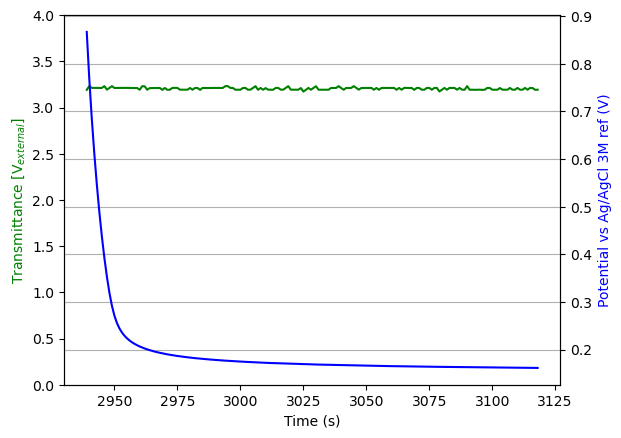

In [31]:
CV_20240424_B()